# Telecommunication Churn Prediction

### Batch Details: **PGPDSE-FT CHENNAI SEP23  Batch - 1**



### Team Members: 
- **Chandru V**

- **Giridaran D**

- **Keerthi Sharran S**

- **Rohit V**  

- **Tejaswini S**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = [10, 6]
import scipy.stats as stats

# Read Data

In [2]:
df1 = pd.read_csv("train.csv")
df1.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

**Target column is churn prediction.**

In [3]:
print("Number of columns: ",df1.shape[1])
print("NUmber of rows: ", df1.shape[0])

Number of columns:  172
NUmber of rows:  69999


# 5 point Analysis

In [4]:
df1.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

# Columns Description

In [5]:
df_colum = pd.read_csv("data_dictionary.csv")
df_colum

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


### NULL values in each columns

In [6]:
df1.isna().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [7]:
print("Total number of null values:", df1.isna().sum().sum())

Total number of null values: 1835086


### percentage of null values in each columns

In [8]:
perecent_null = (df1.isna().sum() / df1.shape[0]) * 100
perecent_null

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

**If there is to much null values in the feature, we can't get valuable insights from the feature lets drop the features which as null value more than 70%.**

In [9]:
# features greater than 70% Null values
values_greater70percent_null = [i for i, j in zip(perecent_null.index, perecent_null.values) if j >= 70]
values_greater70percent_null

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [10]:
df1['loc_og_t2o_mou'].unique()

array([ 0., nan])

In [11]:
df1['std_og_t2o_mou'].unique()

array([ 0., nan])

In [12]:
df1['loc_ic_t2o_mou'].unique()

array([ 0., nan])

In [13]:
df1['circle_id'].unique()

array([109], dtype=int64)

In [14]:
df1['last_date_of_month_6'].unique()

array(['6/30/2014'], dtype=object)

In [15]:
df1['last_date_of_month_7'].unique()

array(['7/31/2014', nan], dtype=object)

In [16]:
df1['last_date_of_month_8'].unique()

array(['8/31/2014', nan], dtype=object)

- We have found some columns with only one unique value, like **circle_id**, **loc_og_t2o_mou**, **std_og_t2o_mou**, **loc_ic_t2o_mou**, **last_date_of_month_6**, **last_date_of_month_7**, **last_date_of_month_8**, so it is of no use for the analysis, hence we have dropped those columns.
- We will also drop the Id column since it will not provide any value to the Analysis.

# Droping Columns

In [17]:
df2 = df1.copy()

#### Dropping the column with single unique values

In [18]:
column_with_1_unique_val = ['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','id']

In [19]:
df2.drop(column_with_1_unique_val, inplace=True, axis=1)

#### Dropping the columns which has null value more than or equal to 70%.

In [20]:
df2.drop(values_greater70percent_null, axis=1, inplace=True)

In [480]:
import json
columns_to_drop = column_with_1_unique_val + values_greater70percent_null
json_string = json.dumps(columns_to_drop)

# Open a file in write mode
with open("columnsToDrop.json", "w") as f:
    # Write the JSON string to the file
    f.write(json_string)

In [21]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.0

In [22]:
df2.shape

(69999, 128)

In [23]:
df2.isna().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

In [24]:
perecent_null = (df2.isna().sum() / df2.shape[0]) * 100
perecent_null

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t2t_mou_6       3.954342
std_og_t

In [25]:
df2.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,306.451436,310.572674,304.513065,48.043255,47.882736,47.256388,1

# Data Analysis And Visulization

**Churn User 5 point Analyis**

In [30]:
churn_df = df2[df2['churn_probability'] ==  1]
churn_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,7132.000000,7132.000000,7132.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.00000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,7132.000000,7132.000000,7132.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,7132.000000,7132.000000,7132.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,6220.000000,5651.000000,4191.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.00000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.0
mean,308.289067,219.081400,114.226380,191.239495,146.320051,84.629559,239.100389,184.564268,105.980477,18.355133,19.586677,24.636841,28.197725,26.589076,34.323794,31.39686,22.061938,12.193610,61.386868,45.574743,24.386982,1.903463,1.630411,1.117616,1.229439,1.675764,0.984722,94.692889,69.271878,37.701346,147.988056,112.828747,57.536089,153.697971,117.342490,58.611215,0.658469,0.615436,0.301119,302.348000,230.789588,116.450234,1.614055,1.101801,0.887385,4.734227,5.347186,2.579499,0.639264,0.013437,0.000902,352.370766,242.877399,92.624937,34.828175,27.516392,13.016764,71.246395,52.086287,28.273026,5.956191,4.622196,2.258160,112.037365,84.230451,43.551797,12.302588,10.174012,5.000721,24.155587,17

**No Churn User 5 point Analyis**

In [31]:
no_churn_df = df2[df2['churn_probability'] ==  0]
no_churn_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,62867.000000,62867.000000,62867.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,62867.000000,62867.000000,62867.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,62867.000000,62867.000000,62867.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,61011.000000,61661.000000,62105.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.00000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.0
mean,280.280668,284.891073,297.535694,127.231453,132.755677,136.240947,194.773816,198.307128,202.655000,8.889725,5.862381,5.815044,12.758025,8.307401,8.114952,48.485876,48.375597,47.946267,96.485440,94.943896,95.624855,3.930736,3.973761,3.833330,1.115483,1.332210,1.450270,148.909538,147.300834,147.412008,73.751224,81.113261,85.221671,81.469786,89.173787,92.744804,1.174080,1.127010,1.108797,156.397743,171.416726,179.077957,0.767437,0.784458,0.838562,3.879547,4.942837,5.211407,0.444568,0.025432,0.035229,301.242079,318.252422,328.550893,49.390517,49.749236,49.566963,110.81

- From the above description we can see clearly that, the values of all the features for the churn customer keep on reducing every month, where as for the non-churn customer it stayes consistint or increasing.
- And the VBC is not consistent for churn users they are miss using this feature, since they alredy planned to leave the network, so that they dont pay the bill.
- The churned custommers are have roaming mou greater than a non churn customers.
- The STD calls also have more mou in churn users, but decreseing evry month.

In [27]:
df2.shape

(69999, 128)

## percentage of zeros in all column

In [28]:
(df2.eq(0).sum() / df2.shape[0]) * 100

arpu_6                  3.718625
arpu_7                  3.808626
arpu_8                  5.568651
onnet_mou_6             8.858698
onnet_mou_7             9.200131
onnet_mou_8             9.472992
offnet_mou_6            3.671481
offnet_mou_7            3.781483
offnet_mou_8            4.230060
roam_ic_mou_6          76.652524
roam_ic_mou_7          81.342591
roam_ic_mou_8          80.276861
roam_og_mou_6          76.543951
roam_og_mou_7          81.348305
roam_og_mou_8          80.406863
loc_og_t2t_mou_6       15.914513
loc_og_t2t_mou_7       15.737368
loc_og_t2t_mou_8       15.624509
loc_og_t2m_mou_6        9.384420
loc_og_t2m_mou_7        9.052986
loc_og_t2m_mou_8        9.200131
loc_og_t2f_mou_6       56.460807
loc_og_t2f_mou_7       56.013657
loc_og_t2f_mou_8       55.656509
loc_og_t2c_mou_6       77.062529
loc_og_t2c_mou_7       75.842512
loc_og_t2c_mou_8       73.483907
loc_og_mou_6            8.157259
loc_og_mou_7            7.950114
loc_og_mou_8            8.142973
std_og_t2t

our dataset containes lots of zeros in some columns.

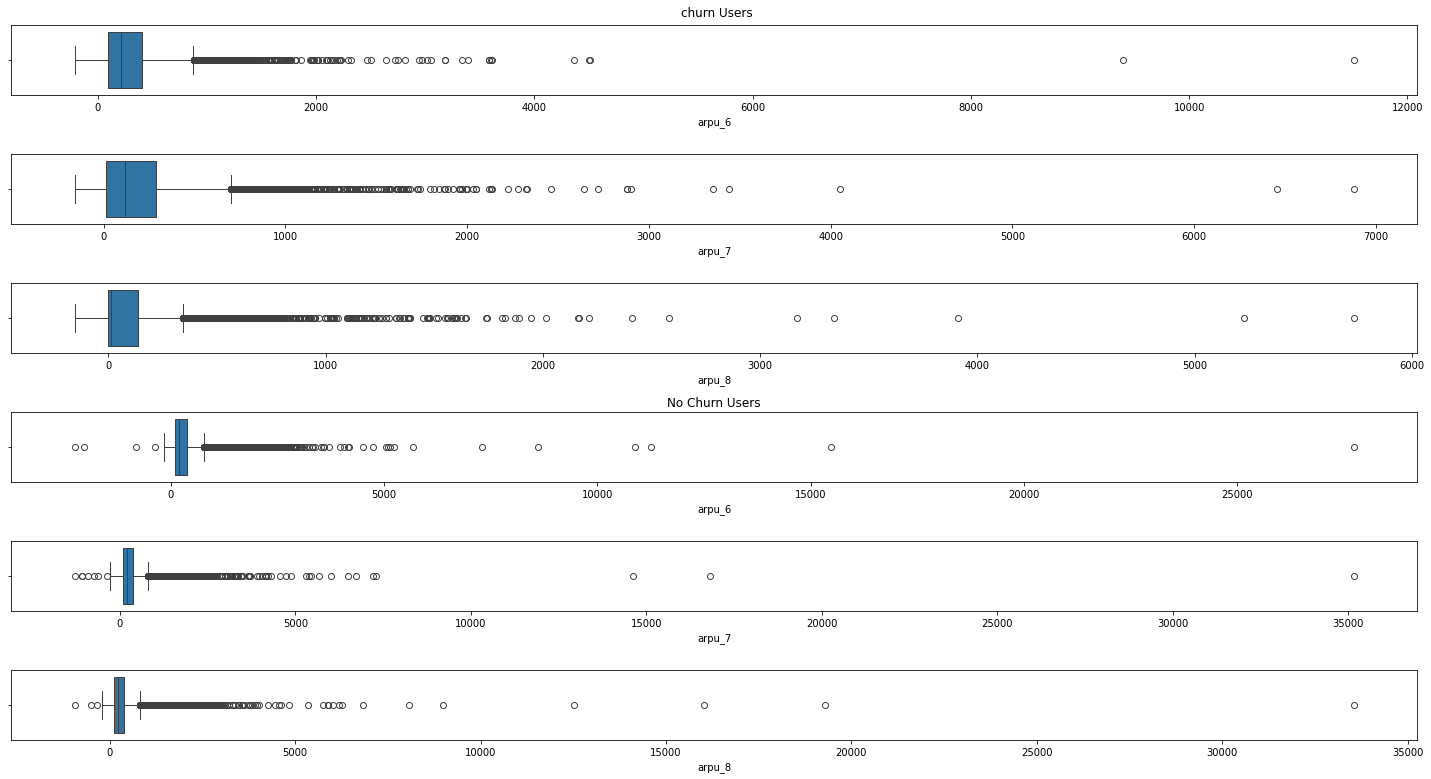

In [32]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.boxplot(churn_df, x='arpu_6', ax=ax[0])
sns.boxplot(churn_df, x='arpu_7', ax=ax[1])
sns.boxplot(churn_df, x='arpu_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.boxplot(no_churn_df, x='arpu_6', ax=ax[3])
sns.boxplot(no_churn_df, x='arpu_7', ax=ax[4])
sns.boxplot(no_churn_df, x='arpu_8', ax=ax[5])
plt.tight_layout()
plt.show()

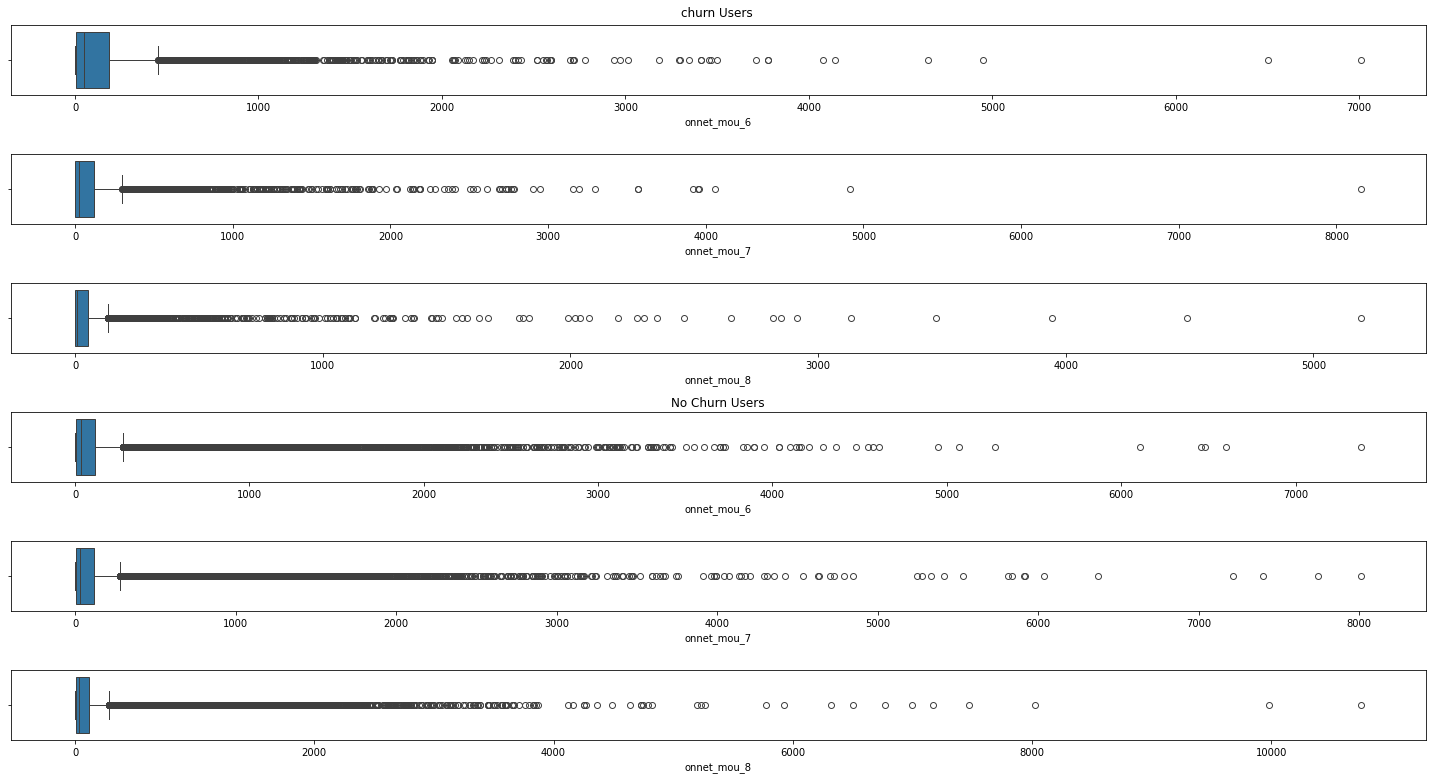

In [289]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.boxplot(churn_df, x='onnet_mou_6', ax=ax[0])
sns.boxplot(churn_df, x='onnet_mou_7', ax=ax[1])
sns.boxplot(churn_df, x='onnet_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.boxplot(no_churn_df, x='onnet_mou_6', ax=ax[3])
sns.boxplot(no_churn_df, x='onnet_mou_7', ax=ax[4])
sns.boxplot(no_churn_df, x='onnet_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

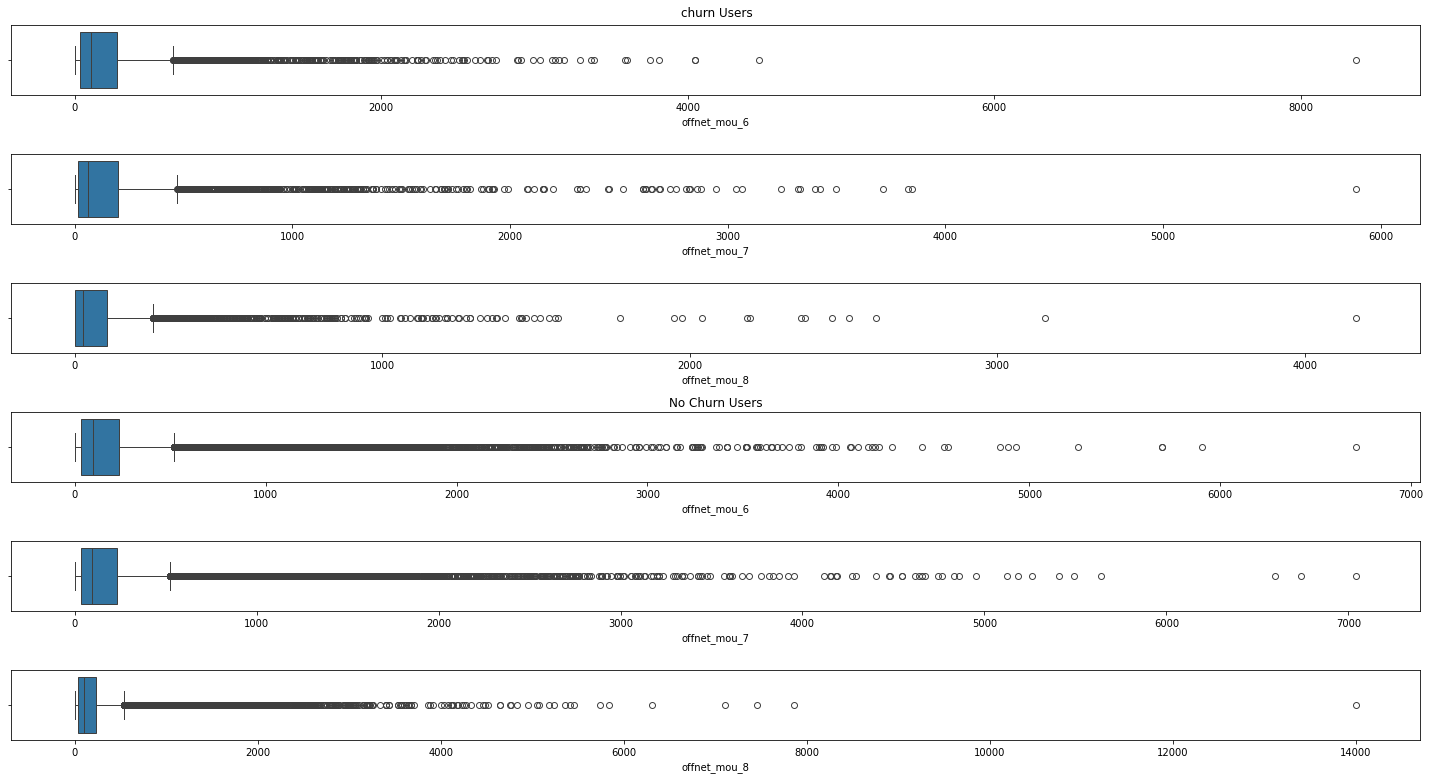

In [290]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.boxplot(churn_df, x='offnet_mou_6', ax=ax[0])
sns.boxplot(churn_df, x='offnet_mou_7', ax=ax[1])
sns.boxplot(churn_df, x='offnet_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.boxplot(no_churn_df, x='offnet_mou_6', ax=ax[3])
sns.boxplot(no_churn_df, x='offnet_mou_7', ax=ax[4])
sns.boxplot(no_churn_df, x='offnet_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

**In the above plot we can see the variattion in the distribution on each month of churn user and no churn user.
we can see the churn user decreasing in the central tendency where as the no churn user are staying consistent.**

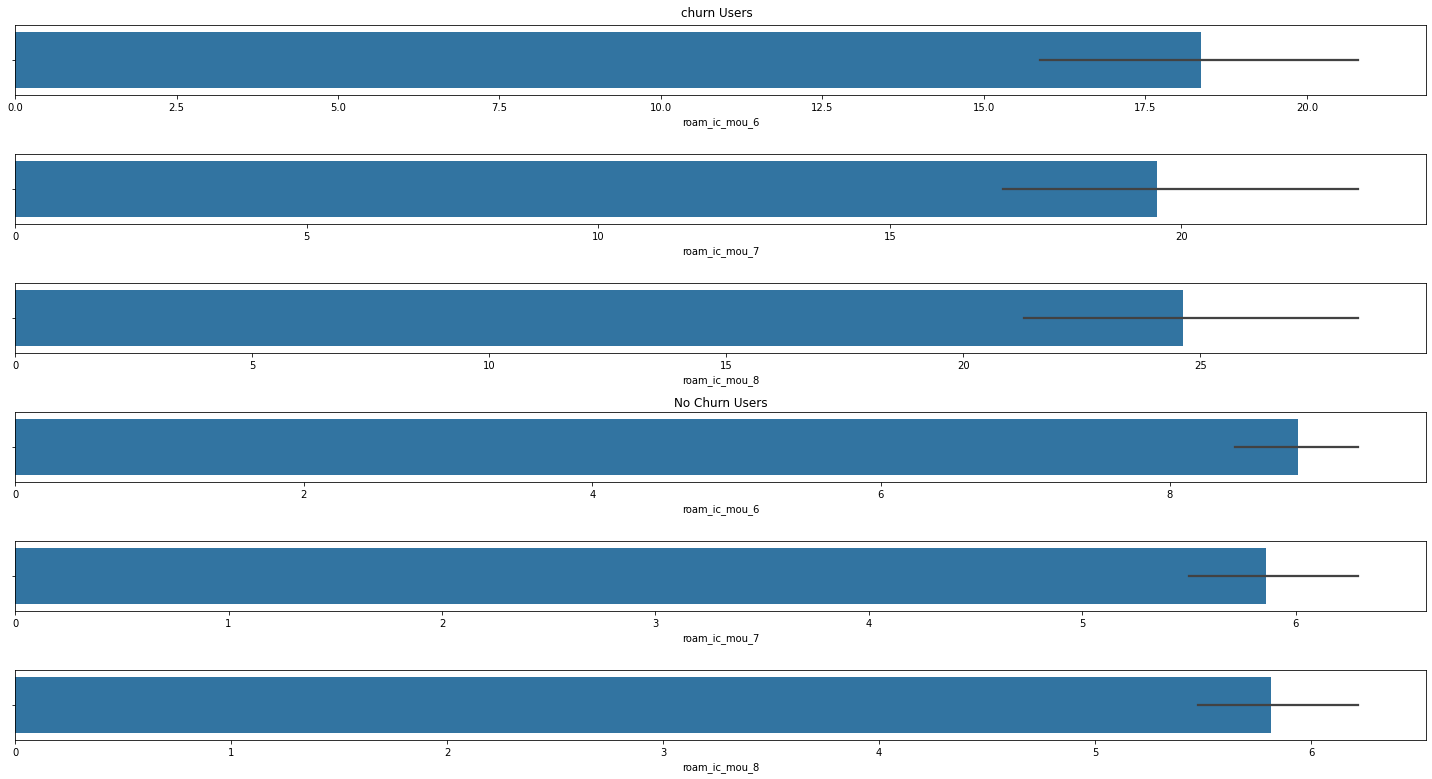

In [291]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.barplot(churn_df, x='roam_ic_mou_6', ax=ax[0])
sns.barplot(churn_df, x='roam_ic_mou_7', ax=ax[1])
sns.barplot(churn_df, x='roam_ic_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.barplot(no_churn_df, x='roam_ic_mou_6', ax=ax[3])
sns.barplot(no_churn_df, x='roam_ic_mou_7', ax=ax[4])
sns.barplot(no_churn_df, x='roam_ic_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

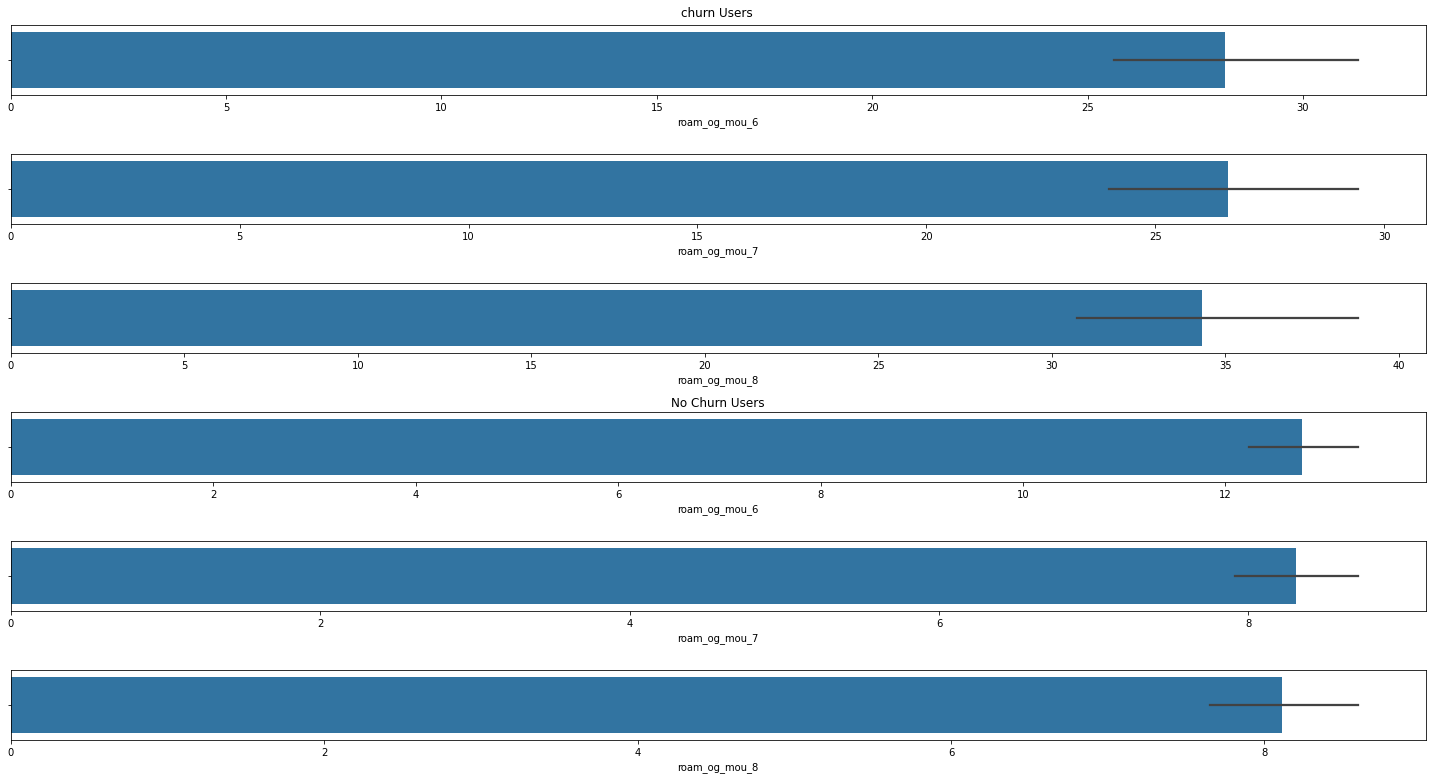

In [292]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.barplot(churn_df, x='roam_og_mou_6', ax=ax[0])
sns.barplot(churn_df, x='roam_og_mou_7', ax=ax[1])
sns.barplot(churn_df, x='roam_og_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.barplot(no_churn_df, x='roam_og_mou_6', ax=ax[3])
sns.barplot(no_churn_df, x='roam_og_mou_7', ax=ax[4])
sns.barplot(no_churn_df, x='roam_og_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

**From the above plot we can see that the churn users roaming usage is high when compared to the non churn users roming useage, This may be the reason why they leaving the network**

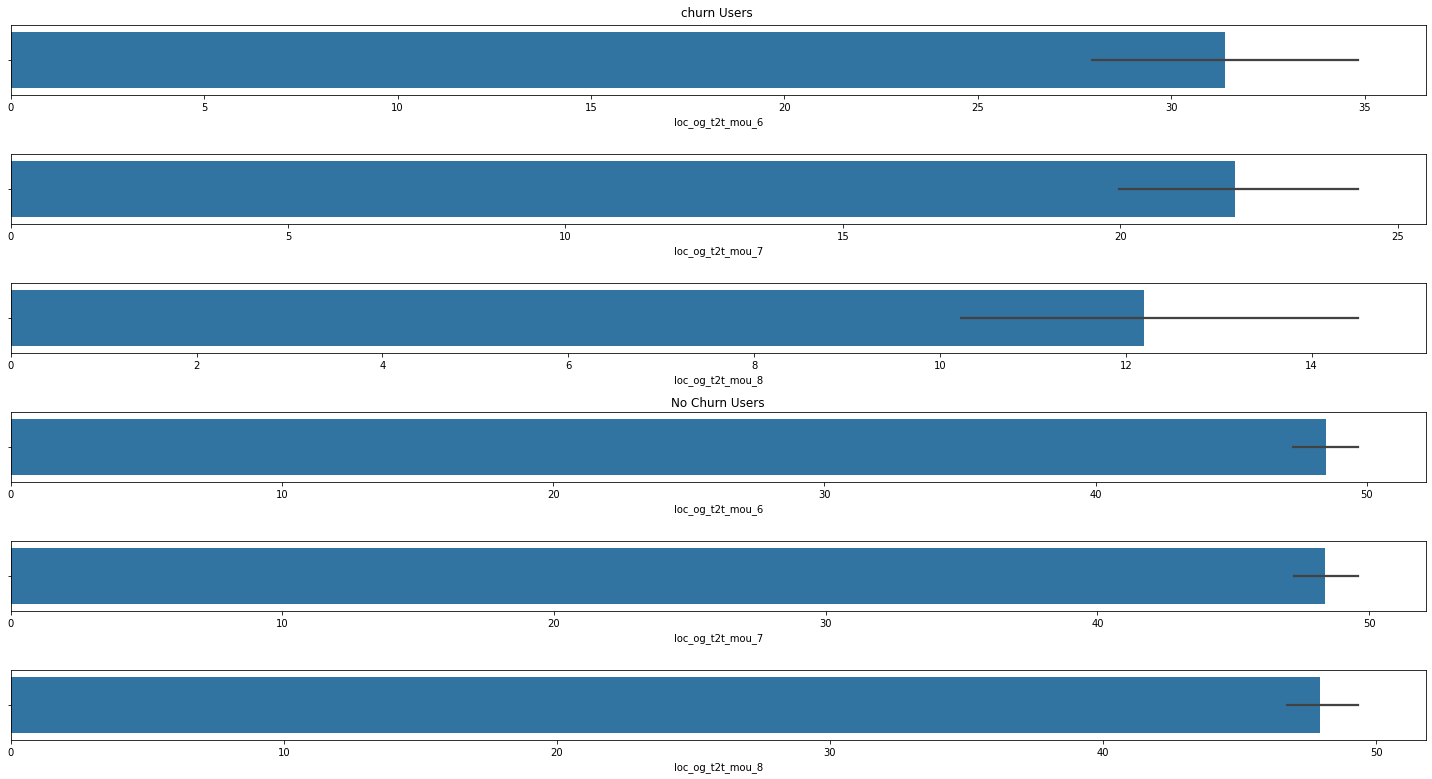

In [293]:
fig, ax = plt.subplots(6, figsize=(20, 11))
fig.suptitle('churn Users')
sns.barplot(churn_df, x='loc_og_t2t_mou_6', ax=ax[0])
sns.barplot(churn_df, x='loc_og_t2t_mou_7', ax=ax[1])
sns.barplot(churn_df, x='loc_og_t2t_mou_8', ax=ax[2])
ax[3].set_title("No Churn Users")
sns.barplot(no_churn_df, x='loc_og_t2t_mou_6', ax=ax[3])
sns.barplot(no_churn_df, x='loc_og_t2t_mou_7', ax=ax[4])
sns.barplot(no_churn_df, x='loc_og_t2t_mou_8', ax=ax[5])
plt.tight_layout()
plt.show()

**In all features we can see lots of variablity between the months in the churn users values.**

In [294]:
len(churn_df[(churn_df[['arpu_6','arpu_7','arpu_8']] < 0).any(axis=1)])

350

In [295]:
len(no_churn_df[(no_churn_df[['arpu_6','arpu_7','arpu_8']] < 0).any(axis=1)])

627

## Filling null values

In [33]:
no_churn_df.median()

C:\Users\GIRIDA~1\AppData\Local\Temp/ipykernel_5748/1728542283.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  no_churn_df.median()


arpu_6                196.125
arpu_7                198.916
arpu_8                210.026
onnet_mou_6            33.190
onnet_mou_7            32.740
onnet_mou_8            33.910
offnet_mou_6           95.790
offnet_mou_7           94.590
offnet_mou_8           97.260
roam_ic_mou_6           0.000
roam_ic_mou_7           0.000
roam_ic_mou_8           0.000
roam_og_mou_6           0.000
roam_og_mou_7           0.000
roam_og_mou_8           0.000
loc_og_t2t_mou_6       12.740
loc_og_t2t_mou_7       12.710
loc_og_t2t_mou_8       13.080
loc_og_t2m_mou_6       43.660
loc_og_t2m_mou_7       43.510
loc_og_t2m_mou_8       44.180
loc_og_t2f_mou_6        0.000
loc_og_t2f_mou_7        0.000
loc_og_t2f_mou_8        0.000
loc_og_t2c_mou_6        0.000
loc_og_t2c_mou_7        0.000
loc_og_t2c_mou_8        0.000
loc_og_mou_6           69.340
loc_og_mou_7           68.490
loc_og_mou_8           69.190
std_og_t2t_mou_6        0.000
std_og_t2t_mou_7        0.000
std_og_t2t_mou_8        0.000
std_og_t2m

In [34]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.0

**filling null values with median**

In [35]:
for col in df2.columns:
    if col not in ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']:
        df2[col].fillna(df2[col].median(), inplace=True)

## Churn Vs No Churn

In [36]:
churn_counts = df2['churn_probability'].value_counts()

In [37]:
perc = (churn_counts / churn_counts.sum()) * 100
perc

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

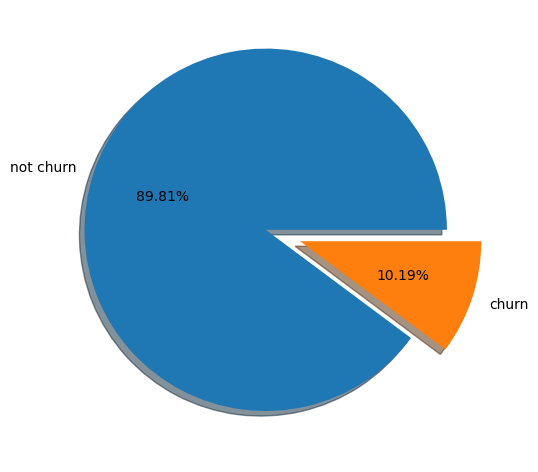

In [38]:
plt.figure(figsize=(10,6), dpi=100)
plt.pie(perc, labels=['not churn','churn'], autopct='%.2f%%', shadow=True, explode=[0.1, 0.1])
plt.show()

**From the above plot we can see we have a imbalanced dataset, We will handle this imbalance afterwords.**

In [39]:
corr_matrix = df2.corr()[(df2.corr() > 0.5) | (df2.corr() < -0.5)]

In [303]:
corr_matrix

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
arpu_6,1.000000,0.743730,0.643193,NaN,NaN,NaN,0.611666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.503610,NaN,NaN,0.952776,0.726028,0.626760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_7,0.743730,1.000000,0.782332,NaN,NaN,NaN,NaN,0.596208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652750,0.511814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751131,0.955298,0.767195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_8,0.643193,0.782332,1.000000,NaN,NaN,NaN,NaN,NaN,0.590380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504649,0.643771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.638997,0.778810,0.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onnet_mou_6,NaN,NaN,NaN,1.000000,0.733869,0.597803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.855852,0.612596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.657879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752357,0.553112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

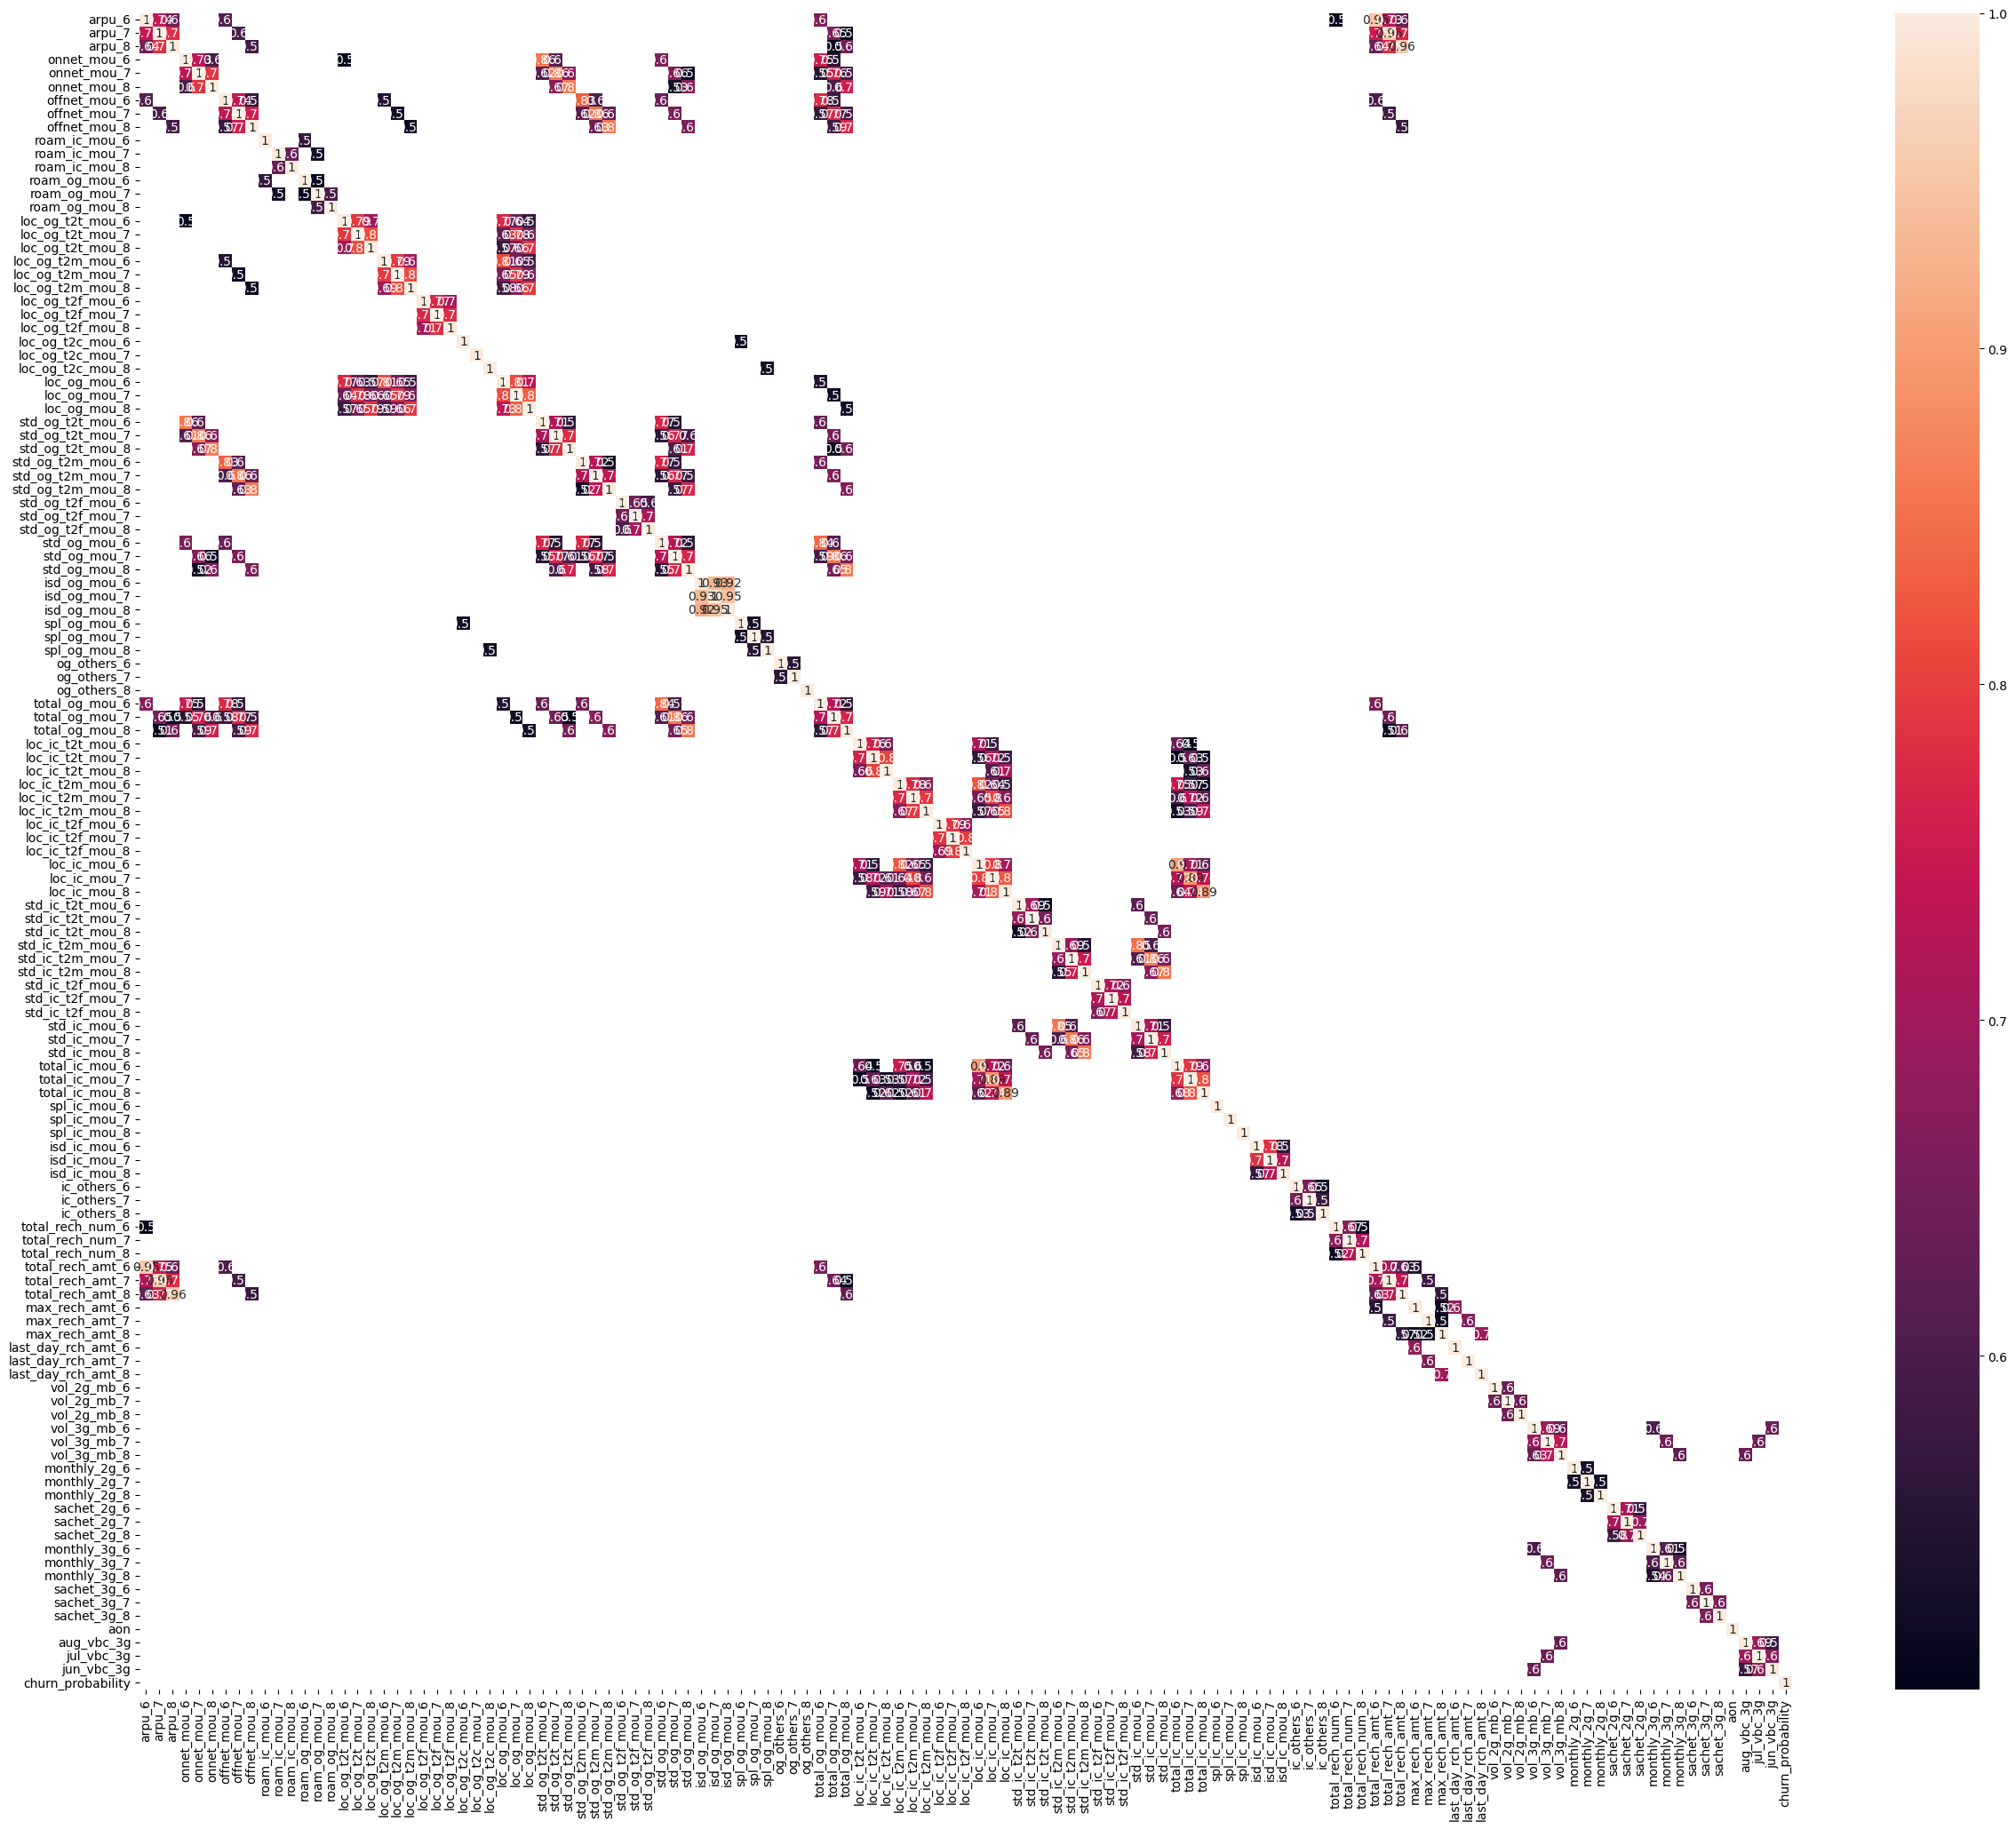

In [304]:
plt.figure(figsize=(30,25), dpi=100)
sns.heatmap(corr_matrix, annot=True)
plt.show()

From this we can see there are lot of Multicorrlation in the data we should reduce that.

### Base Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, roc_auc_score, confusion_matrix

In [41]:
model_metrics = pd.DataFrame(columns=['Model','Sensitivity_train','Specificity_train','Accuracy_train','F1-Score_train','Precission_train',
                                          'ROC_AUC_Score_train','Sensitivity_test','Specificity_test','Accuracy_test','F1-Score_test','Precission_test','ROC_AUC_Score_test'])

In [42]:
def append_to_metric_df(modelname, model, xtrain, xtest, ytrain, ytest):
    
    global model_metrics
    if 'KNN' in modelname:
        y_pred_train = model.predict(xtrain.values)
        y_pred_test = model.predict(xtest.values)
        y_pred_proba_train = model.predict_proba(xtrain.values)[:, 1]
        y_pred_proba_test = model.predict_proba(xtest.values)[:, 1]
    else:
        y_pred_train = model.predict(xtrain)
        y_pred_test = model.predict(xtest)
        y_pred_proba_train = model.predict_proba(xtrain)[:, 1]
        y_pred_proba_test = model.predict_proba(xtest)[:, 1]
    confusion_mat_train = confusion_matrix(ytrain, y_pred_train)
    confusion_mat_test = confusion_matrix(ytest, y_pred_test)
    sensitivity_train = confusion_mat_train[1][1]/ np.sum(confusion_mat_train[1])
    specivicity_train = confusion_mat_train[0][0] / np.sum(confusion_mat_train[0])
    sensitivity_test = confusion_mat_test[1][1]/ np.sum(confusion_mat_test[1])
    specivicity_test = confusion_mat_test[0][0] / np.sum(confusion_mat_test[0])
    f1_sc_train = f1_score(ytrain, y_pred_train)
    f1_sc_test = f1_score(ytest, y_pred_test)
    acu_train = accuracy_score(ytrain, y_pred_train)
    acu_test = accuracy_score(ytest, y_pred_test)
    prec_train = precision_score(ytrain, y_pred_train)
    prec_test = precision_score(ytest, y_pred_test)
    auc_score_train = roc_auc_score(ytrain, y_pred_proba_train)
    auc_score_test = roc_auc_score(ytest, y_pred_proba_test)
    model_metrics = model_metrics.append({'Model':modelname, 
                                          'Sensitivity_train':sensitivity_train, 
                                          'Specificity_train':specivicity_test, 
                                          'Accuracy_train':acu_train, 
                                          'F1-Score_train':f1_sc_train,
                                          'Precission_train':prec_train,
                                          'ROC_AUC_Score_train':auc_score_train,
                                          'Sensitivity_test':sensitivity_test, 
                                          'Specificity_test':specivicity_test, 
                                          'Accuracy_test':acu_test, 
                                          'F1-Score_test':f1_sc_test,
                                          'Precission_test':prec_test,
                                          'ROC_AUC_Score_test':auc_score_test
                                         }, ignore_index=True)
    print("train data report: ")
    print(classification_report(ytrain, y_pred_train))
    print("test data report: ")
    print(classification_report(ytest, y_pred_test))

In [503]:
x = df2.drop(['churn_probability', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
y = df2['churn_probability']

In [504]:
xtrain_b, xtest_b, ytrain_b, ytest_b =  train_test_split(x, y, train_size=0.7, random_state=10, stratify=y)

**1. Base model Logistic regression**

In [494]:
base_model_lr = LogisticRegression(max_iter=1000)
base_model_lr.fit(xtrain_b, ytrain_b)

c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [505]:
append_to_metric_df("Base Model LogisticRegression", base_model_lr, xtrain_b, xtest_b, ytrain_b, ytest_b)

train data report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     44007
           1       0.78      0.45      0.57      4992

    accuracy                           0.93     48999
   macro avg       0.86      0.72      0.76     48999
weighted avg       0.92      0.93      0.92     48999

test data report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18860
           1       0.78      0.45      0.57      2140

    accuracy                           0.93     21000
   macro avg       0.86      0.72      0.77     21000
weighted avg       0.92      0.93      0.92     21000



**2. Base model Decission Tree**

In [496]:
base_model_dt = DecisionTreeClassifier()
base_model_dt.fit(xtrain_b, ytrain_b)

DecisionTreeClassifier()

In [506]:
append_to_metric_df("Base_model_DecisionTreeClassifier", base_model_dt, xtrain_b, xtest_b, ytrain_b, ytest_b)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18860
           1       0.55      0.58      0.56      2140

    accuracy                           0.91     21000
   macro avg       0.75      0.76      0.76     21000
weighted avg       0.91      0.91      0.91     21000



**3. Base Model Randome Forest**

In [498]:
base_model_rf = RandomForestClassifier()
base_model_rf.fit(xtrain_b, ytrain_b)

RandomForestClassifier()

In [507]:
append_to_metric_df("Base_model_RandomForestClassifier", base_model_rf, xtrain_b, xtest_b, ytrain_b, ytest_b)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18860
           1       0.78      0.61      0.69      2140

    accuracy                           0.94     21000
   macro avg       0.87      0.79      0.83     21000
weighted avg       0.94      0.94      0.94     21000



**4. Base Model KNN**

In [508]:
base_model_KNN = KNeighborsClassifier()
base_model_KNN.fit(xtrain_b, ytrain_b)

KNeighborsClassifier()

In [510]:
append_to_metric_df("Base_model_KNN", base_model_KNN, xtrain_b, xtest_b, ytrain_b, ytest_b)

c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


train data report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     44007
           1       0.78      0.49      0.60      4992

    accuracy                           0.93     48999
   macro avg       0.86      0.74      0.78     48999
weighted avg       0.93      0.93      0.93     48999

test data report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18860
           1       0.63      0.38      0.47      2140

    accuracy                           0.91     21000
   macro avg       0.78      0.68      0.71     21000
weighted avg       0.90      0.91      0.90     21000



In [511]:
model_metrics

,Model,Sensitivity_train,Specificity_train,Accuracy_train,F1-Score_train,Precission_train,ROC_AUC_Score_train,Sensitivity_test,Specificity_test,Accuracy_test,F1-Score_test,Precission_test,ROC_AUC_Score_test
0,Base Model LogisticRegression,0.445312,0.985843,0.930386,0.565865,0.775916,0.898532,0.445794,0.985843,0.930810,0.567688,0.781327,0.901069
1,Base_model_DecisionTreeClassifier,1.000000,0.946978,1.000000,1.000000,1.000000,1.000000,0.576168,0.946978,0.909190,0.563915,0.552172,0.761573
2,Base_model_RandomForestClassifier,1.000000,0.981018,1.000000,1.000000,1.000000,1.000000,0.608411,0.981018,0.943048,0.685263,0.784337,0.936853
3,Base_model_KNN,0.490585,0.974867,0.934305,0.603425,0.783680,0.961244,0.375701,0.974867,0.913810,0.470451,0.629108,0.825336


# Feature Engineering

**As we say there is reduction in values for all features in churn users and there is not munh of a difference in non churn users, we are going to feature engineer the variables according to that so that we can differentiate churn usere from non churn users.**

In [155]:
df3 = pd.DataFrame()

In [156]:
#  df3['arpu_diff'] = ((df2['arpu_6'] - df2['arpu_7']) + (df2['arpu_7'] - df2['arpu_8']))

**Using the above formula we going to find the difference between the values between each month and add them together and make them into one feature.
So the value with more difference has more probability to be a churn user and value with the less difference has less probability to be churn.**

**Note : If a user increasing the usage every month he may likes the network (less probability to churn) in that case we will get negative values for non-churn user.**

In [157]:
# code to get difference between 3 columns.
new_columns = []
for col in df2.columns:
    if col == 'churn_probability':
        break
    if (('6' in col)) and col not in ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn_probability']:
        idx = df2.columns.get_loc(col)
        new_col_name = col.split('6')[0] + "diff"
        new_columns.append(new_col_name)
        df3[new_col_name] = (df2.iloc[:,idx] - df2.iloc[:,idx+1]) + (df2.iloc[:,idx+1] - df2.iloc[:,idx+2])
#         df3[new_col_name] = (df2.iloc[:,idx] + df2.iloc[:,idx+1] +  df2.iloc[:,idx+2])

In [158]:
df3[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']] = df2[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']]

In [159]:
df3['aon'] = df2['aon']

In [160]:
df3['churn_probability'] = df2['churn_probability']

### New Dataframe with difference

In [161]:
df3.head()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,aon,churn_probability
0,23.750,47.29,29.91,1.00,1.00,1.95,2.96,1.00,1.00,4.92,45.33,18.75,1.00,64.08,1.0,8.20,0.38,77.58,-5.36,-16.08,1.00,-21.45,0.79,-7.50,1.0,-7.72,-28.72,0.34,1.0,1.11,1,67,55,65,1.00,1.0,1,1,1,1,6/22/2014,7/10/2014,8/24/2014,1958,0
1,-41.953,1.00,-29.89,1.00,1.00,1.00,1.00,1.00,-28.79,1.00,1.00,1.00,1.00,1.00,1.0,-30.66,1.00,-30.66,-8.85,-9.68,-3.05,-21.59,1.00,1.00,1.0,1.00,-21.60,0.99,1.0,1.00,-2,-49,-49,1,1.00,1.0,1,1,1,1,6/12/2014,7/10/2014,8/26/2014,710,0
2,60.806,0.53,53.99,1.00,1.00,0.53,24.11,1.00,2.14,24.64,1.00,28.94,1.00,28.94,1.0,2.89,1.00,56.49,-1.98,66.35,1.00,64.37,11.69,11.83,1.0,23.53,87.65,1.00,1.0,0.75,0,70,70,70,1.00,1.0,1,1,1,1,6/11/2014,7/22/2014,8/24/2014,882,0
3,45.267,7.26,18.53,1.00,-0.63,6.99,14.28,1.00,-7.03,21.28,0.26,10.73,0.56,11.56,1.0,-10.66,1.00,22.19,1.10,-3.15,7.23,5.18,1.00,6.08,1.0,6.08,11.27,1.00,1.0,1.00,-1,30,60,60,1.00,1.0,1,1,1,1,6/15/2014,7/21/2014,8/25/2014,982,0
4,139.143,15.15,47.36,53.64,15.73,4.03,32.13,6.98,1.00,43.15,1.00,4.35,1.00,4.35,1.0,1.00,1.00,47.50,2.78,-8.91,-0.63,-6.77,1.00,1.00,1.0,1.00,-6.77,1.00,1.0,1.00,5,168,20,-5,177.33,1.0,1,1,1,1,6/25/2014,7/26/2014,8/30/2014,647,0


In [162]:
df3.describe()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,aon,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,4.312725,1.683631,3.859884,3.551017,5.175611,1.789848,2.831984,0.731364,0.545991,4.457519,-1.063557,-0.778046,0.963608,-2.469985,0.967565,-0.392123,1.243434,2.038544,1.283316,-0.302500,0.854430,1.085890,0.305870,0.260044,0.890898,-0.079112,1.308893,0.812339,0.039560,0.685943,0.357319,4.404934,-2.859584,1.203189,2.423744,-12.460261,0.925456,0.810554,0.936585,0.948271,1220.639709,0.101887
std,290.217749,268.731341,289.772920,62.754156,76.432056,115.498459,120.940342,9.820744,7.145270,177.568729,238.096072,252.149815,6.918819,372.011258,11.275003,17.700790,5.029714,439.582275,114.395345,132.818904,29.917163,188.575577,50.799313,74.997051,12.880471,95.672101,231.238755,0.355861,56.459941,11.318637,6.986305,357.722164,120.510802,115.801382,214.642090,482.069348,0.293871,1.406103,0.350831,0.617003,952.426321,0.302502
min,-13608.664000,-6790.380000,-13775.050000,-2312.440000,-3589.300000,-6602.700000,-2948.710000,-532.010000,-350.830000,-6717.900000,-6754.040000,-13949.040000,-308.910000,-13979.060000,-537.160000,-893.670000,-347.990000,-14042.060000,-10680.490000,-5971.610000,-1343.390000,-10737.730000,-3422.390000,-2957.750000,-616.160000,-3658.240000,-10829.380000,-16.500000,-3413.290000,-773.130000,-92.000000,-15210.000000,-3949.000000,-3949.000000,-10613.270000,-18888.840000,-3.000000,-39.000000,-8.000000,-40.000000,180.000000,0.000000
25%,-95.502000,-22.105000,-48.165000,1.000000,1.000000,-9.000000,-24.040000,0.370000,1.000000,-34.370000,-0.260000,-5.705000,1.000000,-12.230000,1.000000,-0.800000,1.000000,-76.210000,-11.000000,-31.100000,-0.780000,-43.985000,0.190000,-2.990000,1.000000,-6.070000,-53.480000,0.760000,1.000000,0.870000,-2.000000,-129.000000,-30.000000,-20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,468.000000,0.000000
50%,1.476000,1.000000,1.830000,1.000000,1.000000,0.810000,0.680000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.510000,-0.680000,1.000000,-0.700000,1.000000,1.000000,1.000000,0.990000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,868.000000,0.000000
75%,103.611500,25.830000,56.365000,1.000000,1.000000,9.955000,25.640000,1.000000,1.000000,37.680000,1.380000,7.505000,1.000000,15.215000,1.000000,1.000000,1.000000,84.855000,11.590000,28.680000,1.460000,42.695000,1.000000,3.495000,1.000000,6.590000,53.415000,1.000000,1.000000,1.000000,3.000000,130.000000,23.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1813.000000,0.000000
max,11505.508000,6823.200000,8332.000000,2850.980000,3161.790000,4059.540000,4395.770000,324.070000,336.130000,4417.620000,6987.640000,8314.760000,628.5600

**converting last_date_recharge to date_of_last_rech_diff**

In [163]:
df3['date_of_last_rech_6'] = pd.to_datetime(df3['date_of_last_rech_6'])
df3['date_of_last_rech_7'] = pd.to_datetime(df3['date_of_last_rech_7'])
df3['date_of_last_rech_8'] = pd.to_datetime(df3['date_of_last_rech_8'])

In [164]:
df3['date_of_last_rech_diff'] = ((df3['date_of_last_rech_7'] - df3['date_of_last_rech_6']) + (df3['date_of_last_rech_8'] - df3['date_of_last_rech_7'])).dt.days

In [165]:
df3['date_of_last_rech_diff'].fillna(df3['date_of_last_rech_diff'].median(), inplace=True)

In [166]:
df3.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)

In [167]:
churn_user = df3[df3['churn_probability'] == 1]
no_churn_user = df3[df3['churn_probability'] == 0]

In [168]:
churn_user.describe()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,aon,churn_probability,date_of_last_rech_diff
count,7132.000000,7132.00000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.00000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.0,7132.000000
mean,194.121716,108.27249,120.767695,2.246625,5.125327,17.121513,27.964735,1.775745,1.28942,42.706308,95.735552,99.019944,1.331000,192.645147,1.833481,3.216238,1.369383,259.979564,18.332618,28.870617,4.124508,45.337703,8.345496,15.105313,1.727609,22.592908,100.907371,0.885206,4.957566,1.220461,4.492288,230.118480,50.551739,37.391755,30.786925,64.070855,0.990466,1.120303,0.986820,1.014442,838.399327,1.0,60.092400
std,409.710924,359.16644,371.443608,103.841726,119.718401,127.358234,111.319243,7.511378,6.48975,184.266756,323.018892,337.681381,5.838162,498.048987,22.290818,16.699552,4.193053,559.495779,123.371227,133.061465,23.178669,210.104361,57.616451,88.561922,9.607201,113.805112,270.708681,0.272591,53.857070,7.264983,8.526354,477.870586,147.656072,115.241240,189.562749,533.485094,0.139792,1.190976,0.226167,0.426560,734.241322,0.0,7.864956
min,-5730.327000,-3943.86000,-4166.740000,-2312.440000,-3589.300000,-3412.700000,-1098.370000,-141.690000,-114.55000,-3815.680000,-3484.060000,-4007.940000,-160.530000,-4045.690000,-508.680000,-160.010000,0.010000,-4592.410000,-1233.500000,-993.260000,-212.560000,-1144.110000,-824.130000,-1284.580000,-169.130000,-1435.470000,-1696.140000,-0.300000,-1593.690000,-131.160000,-39.000000,-7916.000000,-1999.000000,-1999.000000,-1961.800000,-6505.530000,-1.000000,-15.000000,-3.000000,-6.000000,180.000000,1.0,32.000000
25%,8.852500,-6.18000,-14.620000,0.457500,0.690000,-3.222500,-9.472500,1.000000,1.00000,-14.352500,1.000000,0.410000,1.000000,0.900000,1.000000,1.000000,1.000000,1.000000,-4.925000,-14.050000,0.070000,-21.882500,1.000000,-0.400000,1.000000,-1.155000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,351.000000,1.0,57.000000
50%,145.971500,10.15500,25.815000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.045000,1.000000,2.525000,1.000000,11.730000,1.000000,1.000000,1.000000,90.795000,1.000000,1.000000,1.000000,1.950000,1.000000,1.000000,1.000000,1.000000,33.790000,1.000000,1.000000,1.000000,3.000000,163.500000,44.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,570.500000,1.0,62.000000
75%,316.062500,100.41750,143.995000,1.000000,1.000000,11.910000,36.677500,1.000000,1.00000,54.230000,64.092500,76.482500,1.000000,237.662500,1.000000,1.442500,1.000000,367.112500,14.782500,42.680000,1.000000,65.952500,3.410000,10.242500,1.000000,18.302500,125.807500,1.000000,1.000000,1.000000,7.000000,369.250000,110.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,996.000000,1.0,62.000000
max,11505.508000,6823.20000,8332.000000,2850.980000,3161.790000,4059.540000,3245.010000,175.560000,336.13000,4025.360000,6987.640000,8314.760000,252.110000,

In [169]:
no_churn_user.describe()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,aon,churn_probability,date_of_last_rech_diff
count,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.000000,62867.0,62867.000000
mean,-17.220317,-10.408433,-9.402822,3.698995,5.181315,0.050535,-0.019222,0.612884,0.461652,0.118353,-12.045014,-12.099713,0.921929,-24.604987,0.869330,-0.801476,1.229145,-27.223793,-0.650856,-3.612069,0.483453,-3.934294,-0.606192,-1.424091,0.795976,-2.651158,-9.990140,0.804073,-0.518368,0.625304,-0.111776,-21.201330,-8.918876,-2.902254,-0.793941,-21.142398,0.918081,0.775415,0.930886,0.940764,1264.003293,0.0,62.399065
std,264.933417,253.656173,275.894361,56.227123,69.848723,113.946061,121.657237,10.042461,7.211085,176.270941,223.834416,237.907381,7.029760,348.061341,9.224481,17.764717,5.115828,413.813748,113.171124,132.387013,30.566066,185.311521,49.885979,73.110484,13.197358,93.045696,223.543883,0.363186,56.721172,11.688562,6.628691,331.879077,115.485959,115.149581,217.071924,475.112422,0.305625,1.424223,0.361835,0.634577,964.581688,0.0,7.303219
min,-13608.664000,-6790.380000,-13775.050000,-2075.900000,-3483.210000,-6602.700000,-2948.710000,-532.010000,-350.830000,-6717.900000,-6754.040000,-13949.040000,-308.910000,-13979.060000,-537.160000,-893.670000,-347.990000,-14042.060000,-10680.490000,-5971.610000,-1343.390000,-10737.730000,-3422.390000,-2957.750000,-616.160000,-3658.240000,-10829.380000,-16.500000,-3413.290000,-773.130000,-92.000000,-15210.000000,-3949.000000,-3949.000000,-10613.270000,-18888.840000,-3.000000,-39.000000,-8.000000,-40.000000,180.000000,0.0,32.000000
25%,-104.185000,-23.940000,-51.550000,1.000000,1.000000,-9.690000,-25.395000,0.230000,1.000000,-36.200000,-1.490000,-7.835000,1.000000,-16.780000,1.000000,-1.230000,1.000000,-88.085000,-11.660000,-32.480000,-1.260000,-45.535000,0.010000,-3.910000,1.000000,-7.525000,-61.035000,0.750000,1.000000,0.800000,-2.000000,-140.000000,-34.000000,-21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,481.000000,0.0,59.000000
50%,-5.499000,0.740000,0.710000,1.000000,1.000000,0.670000,0.300000,1.000000,1.000000,0.330000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.010000,0.360000,-1.370000,1.000000,-1.460000,1.000000,1.000000,1.000000,0.830000,-3.400000,1.000000,1.000000,1.000000,0.000000,-7.000000,-2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,925.000000,0.0,62.000000
75%,81.850000,21.950000,50.000000,1.000000,1.000000,9.630000,24.540000,1.000000,1.000000,36.030000,1.000000,5.130000,1.000000,11.190000,1.000000,1.000000,1.000000,67.600000,11.250000,27.390000,1.610000,40.750000,1.000000,2.940000,1.000000,5.910000,46.175000,1.000000,1.000000,1.000000,3.000000,109.000000,13.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1943.000000,0.0,66.000000
max,4997.653000,4372.350000,4473.750000,2589.090000,2770.880000,3428

## Performing Statistical Test

We can use ANOVA to test the relation ship of independent column with the Target column which is a catagorical variable.

- H0 : There is no relationship between the variables.
- H1 : There is relationship between the variables.

In [170]:
df_stats_test = pd.DataFrame(columns=['features', 'p_value', 'comment'])

In [171]:
from scipy import stats

In [172]:
df3.head()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,aon,churn_probability,date_of_last_rech_diff
0,23.750,47.29,29.91,1.00,1.00,1.95,2.96,1.00,1.00,4.92,45.33,18.75,1.00,64.08,1.0,8.20,0.38,77.58,-5.36,-16.08,1.00,-21.45,0.79,-7.50,1.0,-7.72,-28.72,0.34,1.0,1.11,1,67,55,65,1.00,1.0,1,1,1,1,1958,0,63.0
1,-41.953,1.00,-29.89,1.00,1.00,1.00,1.00,1.00,-28.79,1.00,1.00,1.00,1.00,1.00,1.0,-30.66,1.00,-30.66,-8.85,-9.68,-3.05,-21.59,1.00,1.00,1.0,1.00,-21.60,0.99,1.0,1.00,-2,-49,-49,1,1.00,1.0,1,1,1,1,710,0,75.0
2,60.806,0.53,53.99,1.00,1.00,0.53,24.11,1.00,2.14,24.64,1.00,28.94,1.00,28.94,1.0,2.89,1.00,56.49,-1.98,66.35,1.00,64.37,11.69,11.83,1.0,23.53,87.65,1.00,1.0,0.75,0,70,70,70,1.00,1.0,1,1,1,1,882,0,74.0
3,45.267,7.26,18.53,1.00,-0.63,6.99,14.28,1.00,-7.03,21.28,0.26,10.73,0.56,11.56,1.0,-10.66,1.00,22.19,1.10,-3.15,7.23,5.18,1.00,6.08,1.0,6.08,11.27,1.00,1.0,1.00,-1,30,60,60,1.00,1.0,1,1,1,1,982,0,71.0
4,139.143,15.15,47.36,53.64,15.73,4.03,32.13,6.98,1.00,43.15,1.00,4.35,1.00,4.35,1.0,1.00,1.00,47.50,2.78,-8.91,-0.63,-6.77,1.00,1.00,1.0,1.00,-6.77,1.00,1.0,1.00,5,168,20,-5,177.33,1.0,1,1,1,1,647,0,66.0


In [173]:
for col in df3.columns:
    if col != 'churn_probability':
        no_chur = df3[df3['churn_probability'] == 0][col]
        churn = df3[df3['churn_probability'] == 1][col]
        stats_val , p_val = stats.f_oneway(no_chur, churn)
        if p_val < 0.05:
            comment = "Reject H0"
        else:
            comment = "Fail to Reject H0"
        df_stats_test = df_stats_test.append({'features':col, 'p_value':p_val, 'comment':comment}, ignore_index=True)

In [174]:
df_stats_test

,features,p_value,comment
0,arpu_diff,0.000000e+00,Reject H0
1,onnet_mou_diff,4.213311e-276,Reject H0
2,offnet_mou_diff,1.120807e-285,Reject H0
3,roam_ic_mou_diff,6.398568e-02,Fail to Reject H0
4,roam_og_mou_diff,9.532500e-01,Fail to Reject H0
5,loc_og_t2t_mou_diff,2.575405e-32,Reject H0
6,loc_og_t2m_mou_diff,9.608582e-77,Reject H0
7,loc_og_t2f_mou_diff,2.553049e-21,Reject H0
8,loc_og_t2c_mou_diff,1.784881e-20,Reject H0
9,loc_og_mou_diff,2.504527e-82,Reject H0


<Axes: xlabel='date_of_last_rech_diff', ylabel='Density'>

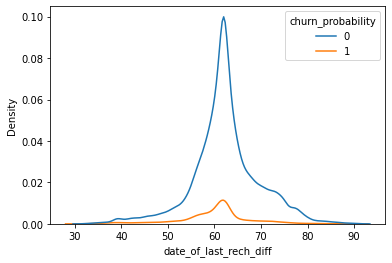

In [175]:
sns.kdeplot(x=df3['date_of_last_rech_diff'], hue=df3['churn_probability'])

<Axes: xlabel='roam_ic_mou_diff', ylabel='Density'>

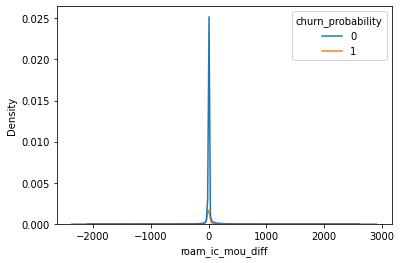

In [176]:
sns.kdeplot(x=df3['roam_ic_mou_diff'], hue=df3['churn_probability'])

<Axes: xlabel='roam_og_mou_diff', ylabel='Density'>

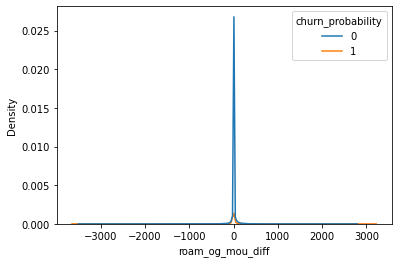

In [177]:
sns.kdeplot(x=df3['roam_og_mou_diff'], hue=df3['churn_probability'])

From the above metrics we can see that roam_ic and roam_og has no relationship with the target variable. So we can drop those columns to build the better model.

In [68]:
col_to_drop = ['roam_og_mou_diff', 'roam_ic_mou_diff']

In [87]:
df4 = df3.drop(col_to_drop, axis=1)

In [547]:
import json
columns_to_drop = col_to_drop
json_string = json.dumps(columns_to_drop)

# Open a file in write mode
with open("columnsToDrop_stats.json", "w") as f:
    # Write the JSON string to the file
    f.write(json_string)

In [88]:
len(df4.columns)

41

In [71]:
# for col in df4.columns:
#     if col != 'churn_probability':
#         sns.scatterplot(x=df4[col], y=df4['churn_probability'], hue=df4['churn_probability'])
#         plt.show()

**corrlation after feature engineering**

In [548]:
corr_matrix = df4.corr()[(df4.corr() > 0.5) | (df4.corr() < -0.5)]

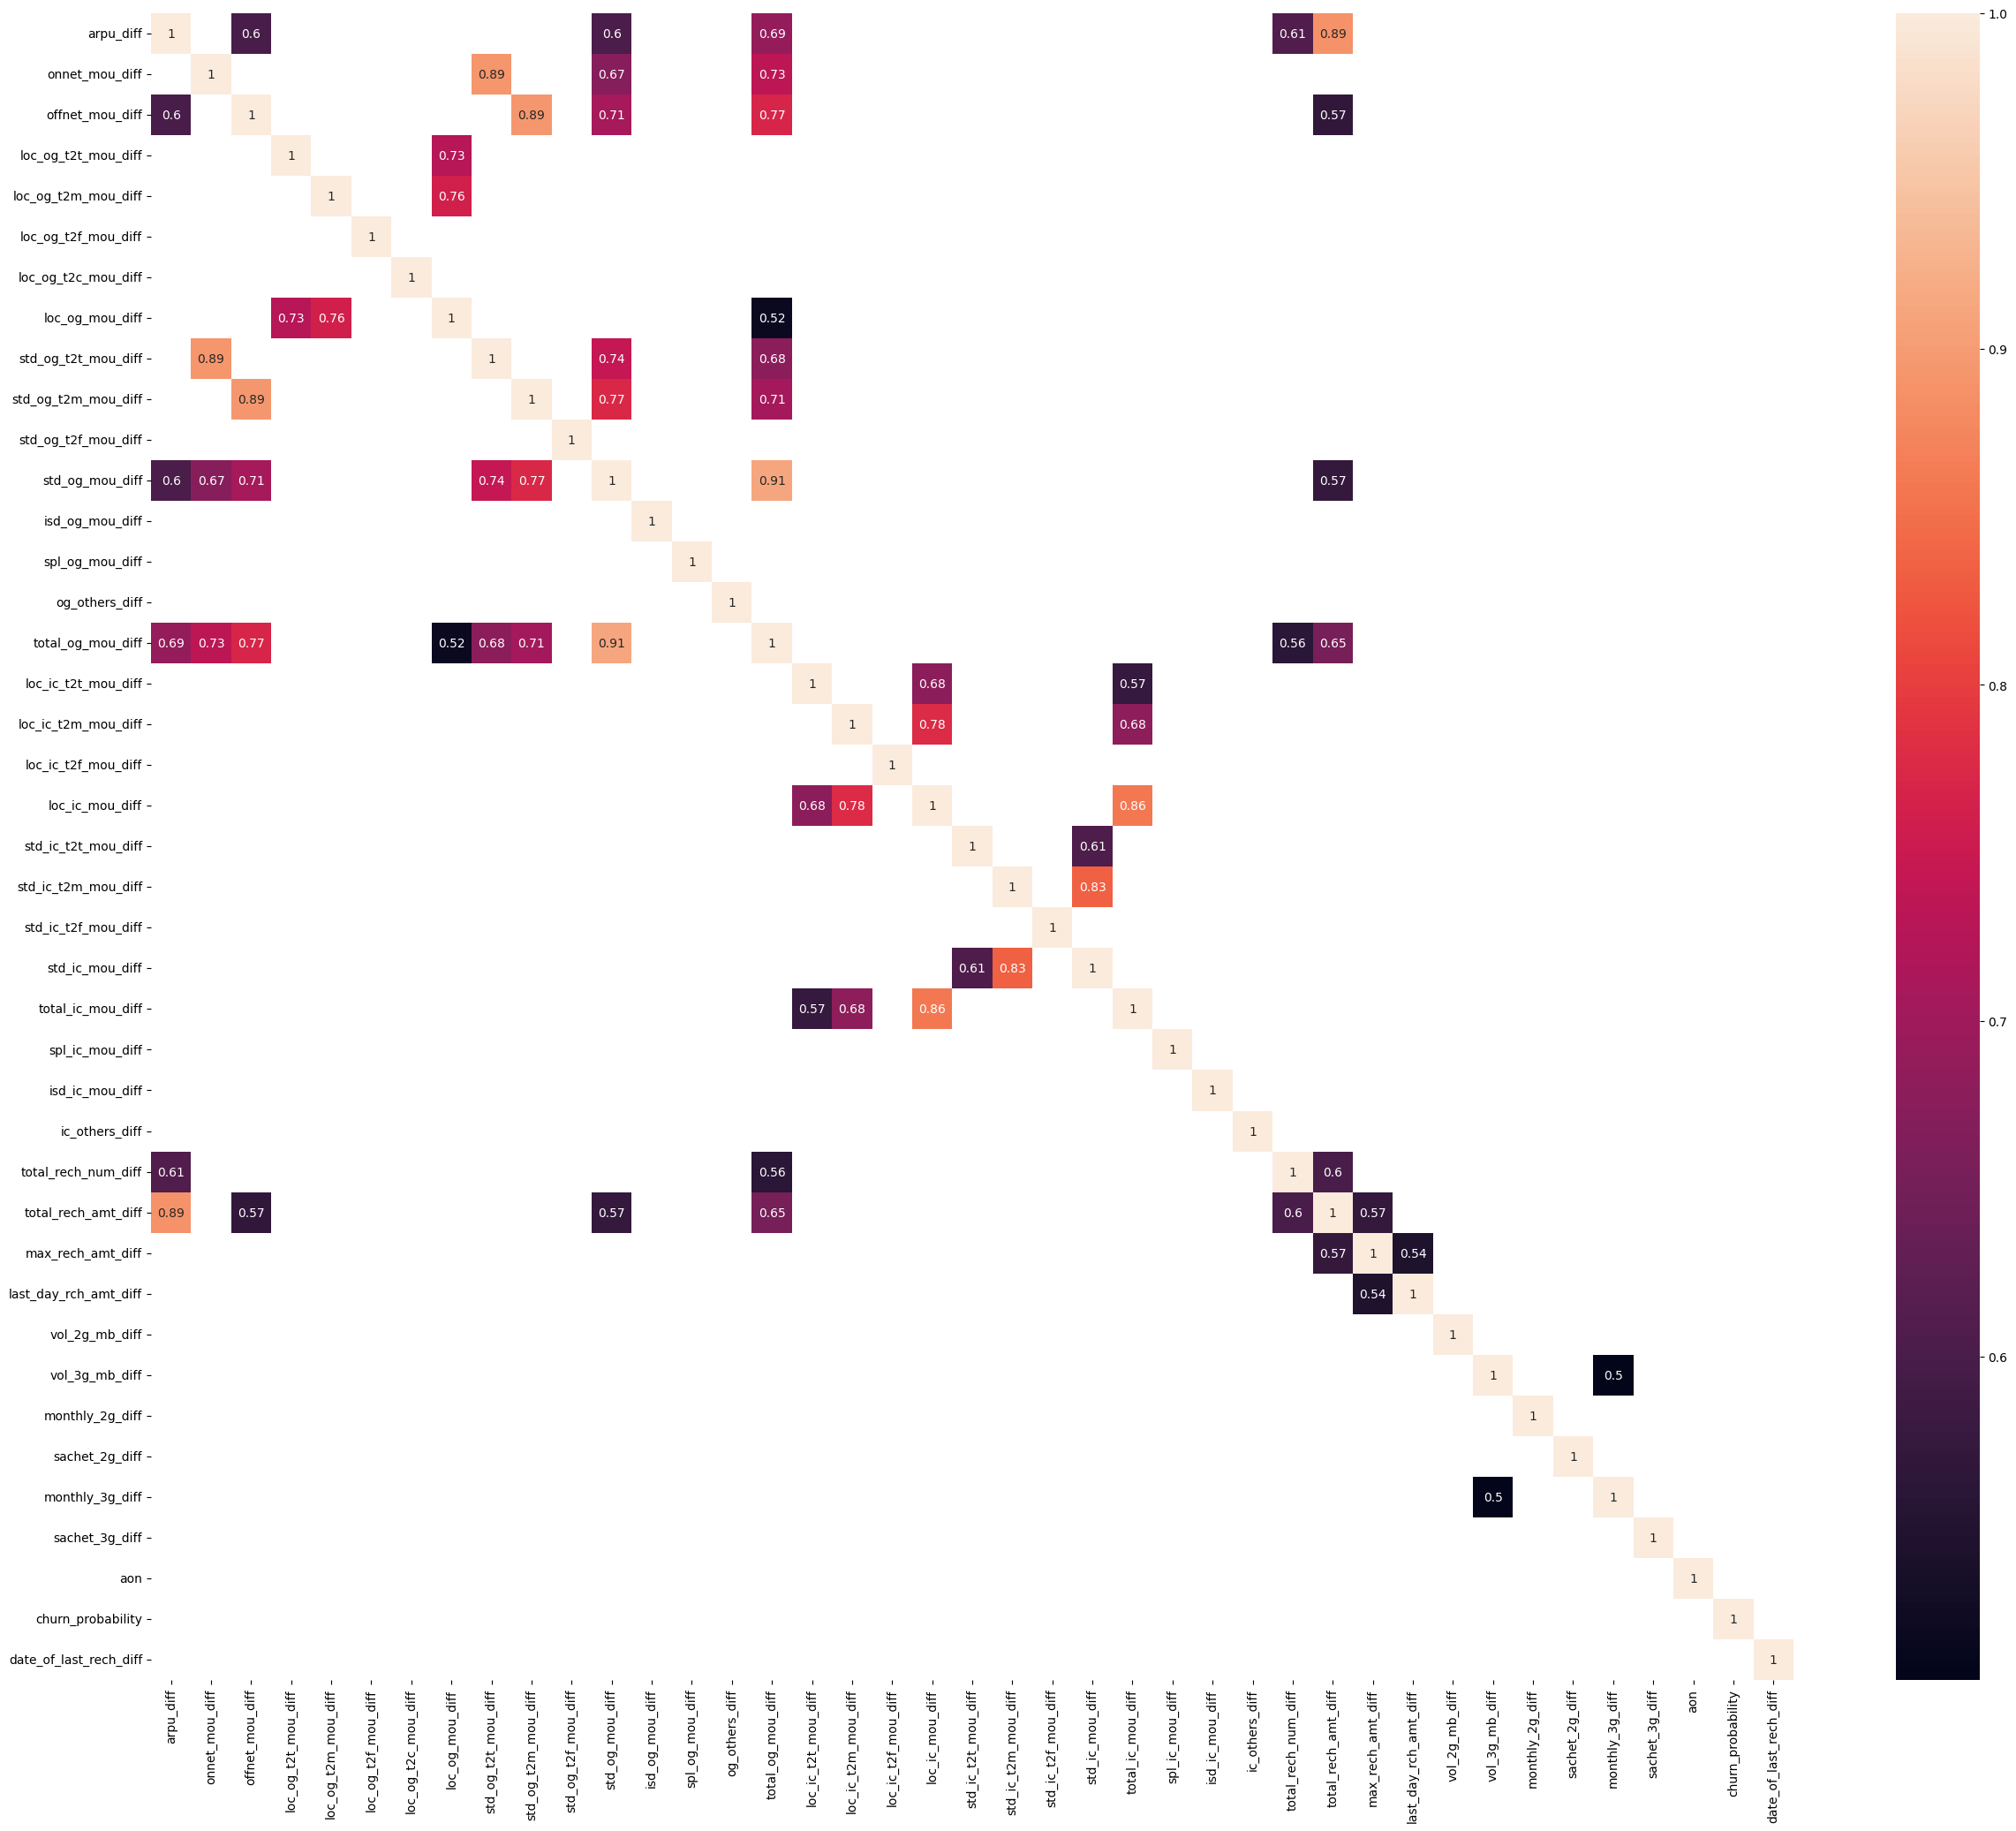

In [551]:
plt.figure(figsize=(30,25), dpi=100)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [178]:
df4.churn_probability.unique()

array([0, 1], dtype=int64)

<Axes: ylabel='arpu_diff'>

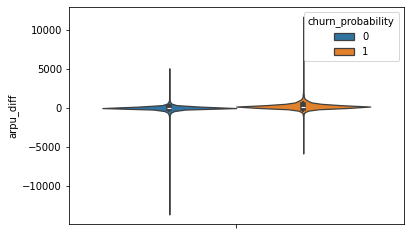

In [179]:
sns.violinplot(y=df3['arpu_diff'], hue=df3['churn_probability'])

<Axes: ylabel='onnet_mou_diff'>

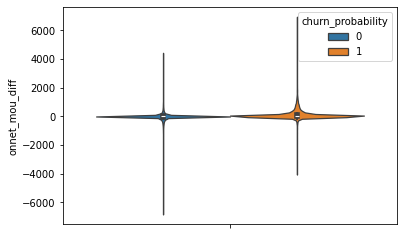

In [180]:
sns.violinplot(y=df3['onnet_mou_diff'], hue=df3['churn_probability'])

<Axes: ylabel='total_ic_mou_diff'>

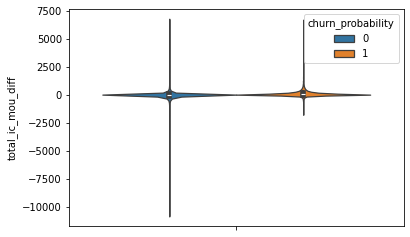

In [224]:
sns.violinplot(y=df3['total_ic_mou_diff'], hue=df3['churn_probability'])

<Axes: ylabel='total_rech_amt_diff'>

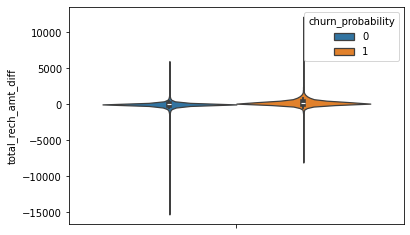

In [182]:
sns.violinplot(y=df3['total_rech_amt_diff'], hue=df3['churn_probability'])

<Axes: ylabel='roam_ic_mou_diff'>

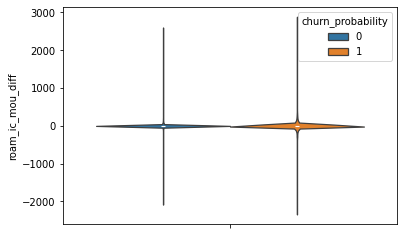

In [183]:
sns.violinplot(y=df3['roam_ic_mou_diff'], hue=df3['churn_probability'])

<Axes: ylabel='roam_og_mou_diff'>

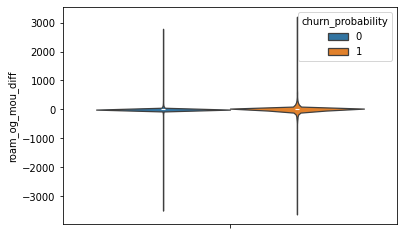

In [184]:
sns.violinplot(y=df3['roam_og_mou_diff'], hue=df3['churn_probability'])

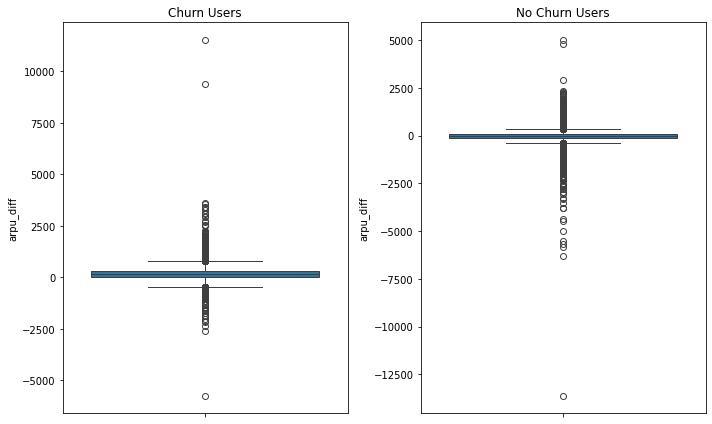

In [353]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='arpu_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='arpu_diff', ax=ax[1])
plt.tight_layout()
plt.show()

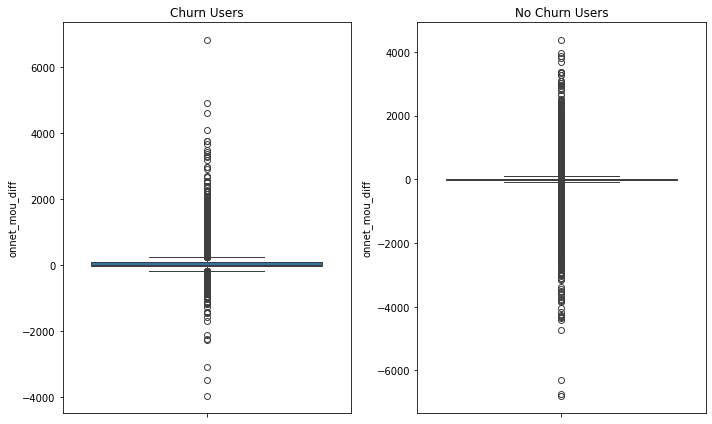

In [354]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='onnet_mou_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='onnet_mou_diff', ax=ax[1])
plt.tight_layout()
plt.show()

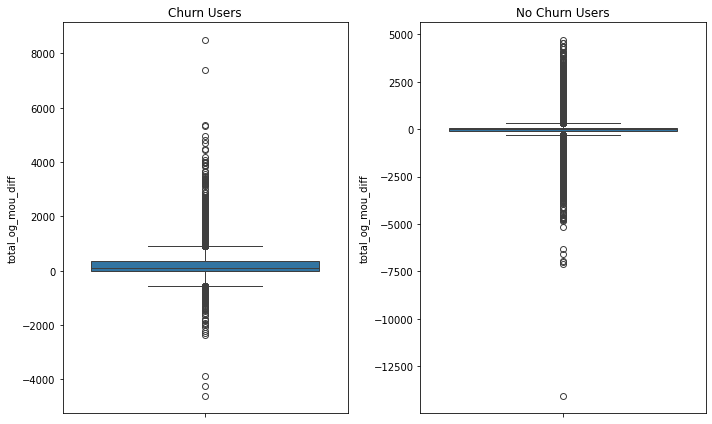

In [355]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='total_og_mou_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='total_og_mou_diff', ax=ax[1])
plt.tight_layout()
plt.show()

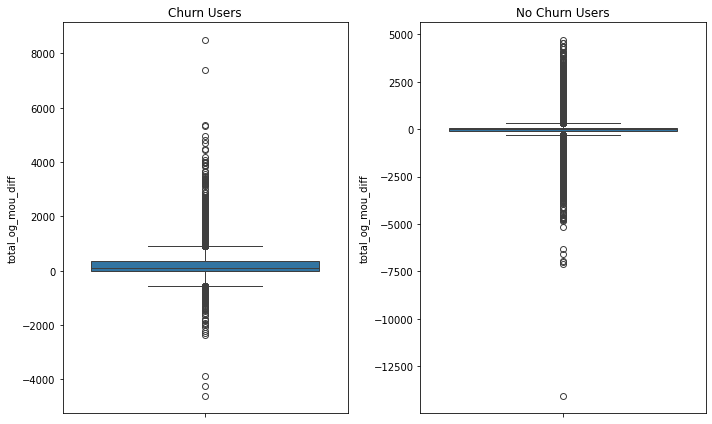

In [537]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("Churn Users")
sns.boxplot(data=churn_user ,y='total_og_mou_diff', ax=ax[0])
ax[1].set_title("No Churn Users")
sns.boxplot(data=no_churn_user ,y='total_og_mou_diff', ax=ax[1])
plt.tight_layout()
plt.show()

From the above plots we can infer that the churn users data is more disperse when compared to no_chuen users.

In [185]:
churn_negative_percent = []
for col in churn_user.columns:
    if col not in  ['churn_probability', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']:
        val = (np.sum(churn_user[col] < 0) / churn_user.shape[0]) * 100
        churn_negative_percent.append(val)

In [186]:
no_churn_negative_percent = []
col_list = []
for col in no_churn_user.columns:
    if col not in ['churn_probability', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8']:
        col_list.append(col)
        val = (np.sum(no_churn_user[col] < 0) / no_churn_user.shape[0]) * 100
        no_churn_negative_percent.append(val)

In [187]:
neagtive_perc = {'churn':churn_negative_percent, 'no_churn':no_churn_negative_percent}

In [188]:
negative_percent =  pd.DataFrame(neagtive_perc, index=col_list)

In [189]:
negative_percent.head(10)

,churn,no_churn
arpu_diff,21.256310,52.133870
onnet_mou_diff,29.262479,47.513004
offnet_mou_diff,30.440269,49.202284
roam_ic_mou_diff,22.378015,8.762944
roam_og_mou_diff,22.854739,8.804301
loc_og_t2t_mou_diff,30.398205,45.645569
loc_og_t2m_mou_diff,31.940550,49.281817
loc_og_t2f_mou_diff,4.276500,22.235831
loc_og_t2c_mou_diff,6.379697,14.272989
loc_og_mou_diff,31.758273,49.448836


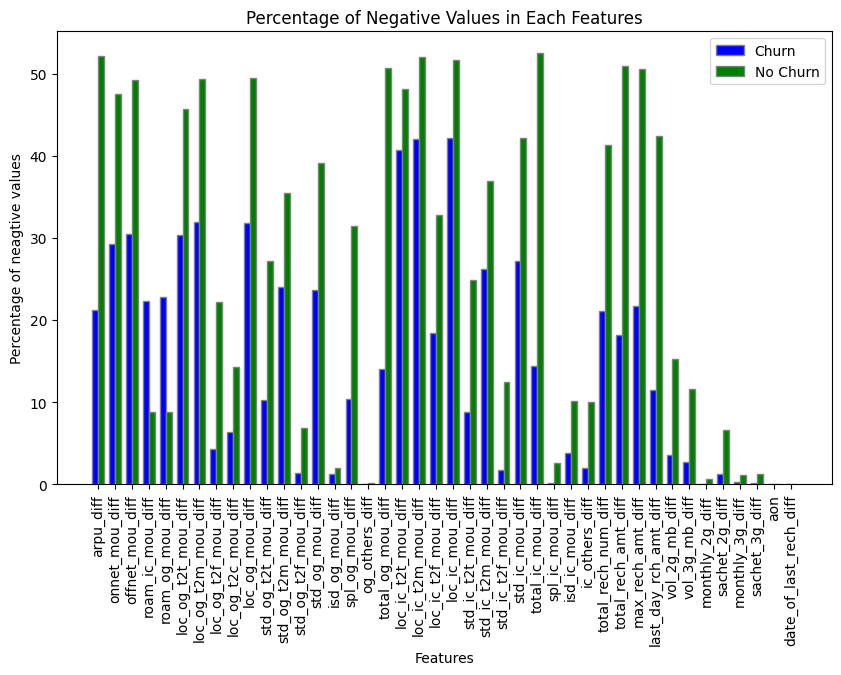

In [190]:
bar_width = 0.35
plt.figure(figsize=(10,6), dpi=100)
r1 = np.arange(len(negative_percent.index))
r2 = [x + bar_width for x in r1]

plt.bar(r1, negative_percent['churn'], color='b', width=bar_width, edgecolor='grey', label='Churn')
plt.bar(r2, negative_percent['no_churn'], color='g', width=bar_width, edgecolor='grey', label='No Churn')

plt.xlabel('Features')
plt.xticks([r + bar_width/2 for r in range(len(negative_percent.index))], negative_percent.index)
plt.ylabel('Percentage of neagtive values')
plt.title('Percentage of Negative Values in Each Features')
plt.legend()
plt.xticks(rotation=90)

# Show the plot
plt.show()

**As discussed above we can see that the non churn users has more number of neagtive value than churn users, So the feature enginnering what we done is correct.**

In [191]:
# df4 = df3.copy()

In [192]:
df4.head()

,arpu_diff,onnet_mou_diff,offnet_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,loc_og_t2c_mou_diff,loc_og_mou_diff,std_og_t2t_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,og_others_diff,total_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,loc_ic_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,std_ic_mou_diff,total_ic_mou_diff,spl_ic_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,last_day_rch_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,aon,churn_probability,date_of_last_rech_diff
0,23.750,47.29,29.91,1.95,2.96,1.00,1.00,4.92,45.33,18.75,1.00,64.08,1.0,8.20,0.38,77.58,-5.36,-16.08,1.00,-21.45,-0.21,-7.50,1.0,-7.72,-28.72,-0.66,1.0,1.11,1,67,55,65,1.00,1.0,1,1,1,1,1958,0,63.0
1,-42.953,1.00,-30.89,1.00,1.00,1.00,-29.79,1.00,1.00,1.00,1.00,1.00,1.0,-31.66,1.00,-31.66,-8.85,-9.68,-3.05,-21.59,1.00,1.00,1.0,1.00,-21.60,-0.01,1.0,1.00,-2,-50,-50,1,1.00,1.0,1,1,1,1,710,0,75.0
2,60.806,0.53,53.99,0.53,24.11,1.00,2.14,24.64,1.00,28.94,1.00,28.94,1.0,2.89,1.00,56.49,-1.98,66.35,1.00,64.37,11.69,11.83,1.0,23.53,87.65,1.00,1.0,-0.25,1,70,70,70,1.00,1.0,1,1,1,1,882,0,74.0
3,45.267,7.26,18.53,6.99,14.28,1.00,-8.03,21.28,0.26,10.73,0.56,11.56,1.0,-10.66,1.00,22.19,1.10,-3.15,7.23,5.18,1.00,6.08,1.0,6.08,11.27,1.00,1.0,1.00,-1,30,60,60,1.00,1.0,1,1,1,1,982,0,71.0
4,139.143,15.15,47.36,4.03,32.13,6.98,1.00,43.15,1.00,4.35,1.00,4.35,1.0,1.00,1.00,47.50,2.78,-8.91,-0.63,-6.77,1.00,1.00,1.0,1.00,-6.77,1.00,1.0,1.00,5,168,20,-5,177.33,1.0,1,1,1,1,647,0,66.0


In [193]:
df4.isna().sum()

arpu_diff                 0
onnet_mou_diff            0
offnet_mou_diff           0
loc_og_t2t_mou_diff       0
loc_og_t2m_mou_diff       0
loc_og_t2f_mou_diff       0
loc_og_t2c_mou_diff       0
loc_og_mou_diff           0
std_og_t2t_mou_diff       0
std_og_t2m_mou_diff       0
std_og_t2f_mou_diff       0
std_og_mou_diff           0
isd_og_mou_diff           0
spl_og_mou_diff           0
og_others_diff            0
total_og_mou_diff         0
loc_ic_t2t_mou_diff       0
loc_ic_t2m_mou_diff       0
loc_ic_t2f_mou_diff       0
loc_ic_mou_diff           0
std_ic_t2t_mou_diff       0
std_ic_t2m_mou_diff       0
std_ic_t2f_mou_diff       0
std_ic_mou_diff           0
total_ic_mou_diff         0
spl_ic_mou_diff           0
isd_ic_mou_diff           0
ic_others_diff            0
total_rech_num_diff       0
total_rech_amt_diff       0
max_rech_amt_diff         0
last_day_rch_amt_diff     0
vol_2g_mb_diff            0
vol_3g_mb_diff            0
monthly_2g_diff           0
sachet_2g_diff      

**No Null values in this Data**

# Scaling and Transformation of the Data

In [194]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Scaling**

In [195]:
for col in df4.columns:
    if col != 'churn_probability':
        sc = StandardScaler()
        df4[[col]] = sc.fit_transform(df4[[col]])

**Transforming**

In [196]:
for col in df4.columns:
    if col != 'churn_probability':
        transform = PowerTransformer()
        df4[[col]] = transform.fit_transform(df4[[col]])

## Model Building Before Oversampling

In [197]:
x_b_os =  df4.drop('churn_probability', axis=1) 
y_b_os = df4['churn_probability']

In [198]:
y_b_os.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [199]:
xtrain_bos, xtest_bos, ytrain_bos, ytest_bos = train_test_split(x_b_os, y_b_os, train_size=0.7, random_state=100, stratify=y_b_os)

**1. DecisionTreeClassifier**

In [200]:
model_1_bos = DecisionTreeClassifier(class_weight="balanced", random_state=10)
model_1_bos.fit(xtrain_bos, ytrain_bos)

DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [562]:
append_to_metric_df("DecisionTreeClassifier_BOS",model_1_bos,xtrain_bos, xtest_bos, ytrain_bos, ytest_bos)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     18860
           1       0.48      0.47      0.48      2140

    accuracy                           0.89     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.89      0.89      0.89     21000



**2. RandomForest**

In [563]:
model_2_bos = RandomForestClassifier(class_weight="balanced", random_state=10)
model_2_bos.fit(xtrain_bos, ytrain_bos)

RandomForestClassifier(class_weight='balanced', random_state=10)

In [564]:
append_to_metric_df("RandomForestClassifier_BOS",model_2_bos,xtrain_bos, xtest_bos, ytrain_bos, ytest_bos)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00      4992

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

test data report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     18860
           1       0.77      0.48      0.59      2140

    accuracy                           0.93     21000
   macro avg       0.86      0.73      0.78     21000
weighted avg       0.93      0.93      0.93     21000



## SMOTE (Synthetic Minority Oversampling Technique)

In [206]:
x =  df4.drop('churn_probability', axis=1) 
y = df4['churn_probability']

In [207]:
y.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [208]:
from imblearn.over_sampling import SMOTE

In [209]:
sm = SMOTE(sampling_strategy=0.4, random_state=10)

In [210]:
x_sm, y_sm  = sm.fit_resample(x, y)

In [211]:
y_sm.value_counts()

0    62867
1    25146
Name: churn_probability, dtype: int64

# Model Bulding

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [213]:
xtrain, xtest, ytrain, ytest = train_test_split(x_sm, y_sm, train_size=0.7, random_state=100, stratify=y_sm)

In [214]:
xtrain.shape

(61609, 40)

In [215]:
xtest.shape

(26404, 40)

## Logistic Regression

In [585]:
model_1 =  LogisticRegression(max_iter=1000)
model_1.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [586]:
append_to_metric_df("LogisticRegression", model_1, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     44007
           1       0.84      0.43      0.57     17602

    accuracy                           0.81     61609
   macro avg       0.82      0.70      0.72     61609
weighted avg       0.82      0.81      0.79     61609

test data report: 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     18860
           1       0.85      0.44      0.58      7544

    accuracy                           0.82     26404
   macro avg       0.83      0.70      0.73     26404
weighted avg       0.82      0.82      0.80     26404



## Decision Tree

In [587]:
model_2 = DecisionTreeClassifier(class_weight="balanced", random_state=10)
model_2.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [588]:
append_to_metric_df("DecisionTreeClassifier", model_2, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00     17602

    accuracy                           1.00     61609
   macro avg       1.00      1.00      1.00     61609
weighted avg       1.00      1.00      1.00     61609

test data report: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     18860
           1       0.76      0.77      0.76      7544

    accuracy                           0.86     26404
   macro avg       0.83      0.84      0.83     26404
weighted avg       0.87      0.86      0.86     26404



## Random Forest

In [589]:
model_3 = RandomForestClassifier(class_weight="balanced", random_state=10)
model_3.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', random_state=10)

In [590]:
append_to_metric_df("RandomForestClassifier", model_3, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44007
           1       1.00      1.00      1.00     17602

    accuracy                           1.00     61609
   macro avg       1.00      1.00      1.00     61609
weighted avg       1.00      1.00      1.00     61609

test data report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     18860
           1       0.91      0.80      0.85      7544

    accuracy                           0.92     26404
   macro avg       0.92      0.88      0.90     26404
weighted avg       0.92      0.92      0.92     26404



## AdaBoosting

In [592]:
model_4 = AdaBoostClassifier(random_state=10)

In [593]:
model_4.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=10)

In [594]:
append_to_metric_df("AdaBoostClassifier", model_4, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     44007
           1       0.79      0.70      0.74     17602

    accuracy                           0.86     61609
   macro avg       0.84      0.81      0.82     61609
weighted avg       0.86      0.86      0.86     61609

test data report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18860
           1       0.79      0.69      0.74      7544

    accuracy                           0.86     26404
   macro avg       0.83      0.81      0.82     26404
weighted avg       0.86      0.86      0.86     26404



## Gradient Boosting

In [595]:
model_5 = GradientBoostingClassifier(random_state=10)
model_5.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=10)

In [596]:
append_to_metric_df("GradientBoostingClassifier", model_5, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     44007
           1       0.86      0.75      0.80     17602

    accuracy                           0.89     61609
   macro avg       0.88      0.85      0.86     61609
weighted avg       0.89      0.89      0.89     61609

test data report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     18860
           1       0.86      0.74      0.80      7544

    accuracy                           0.89     26404
   macro avg       0.88      0.85      0.86     26404
weighted avg       0.89      0.89      0.89     26404



## XGBoosting

In [216]:
from xgboost import XGBClassifier

In [217]:
model_6 = XGBClassifier(random_state=10)
model_6.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [218]:
append_to_metric_df("XGBClassifier", model_6, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     44007
           1       0.94      0.92      0.93     17602

    accuracy                           0.96     61609
   macro avg       0.95      0.95      0.95     61609
weighted avg       0.96      0.96      0.96     61609

test data report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     18860
           1       0.90      0.86      0.88      7544

    accuracy                           0.93     26404
   macro avg       0.92      0.91      0.92     26404
weighted avg       0.93      0.93      0.93     26404



## KNN

In [600]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [601]:
model_7 = KNeighborsClassifier()
model_7.fit(xtrain, ytrain)

KNeighborsClassifier()

In [602]:
append_to_metric_df("KNN", model_7, xtrain, xtest, ytrain, ytest)

c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\giridaran\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


train data report: 
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     44007
           1       0.74      0.95      0.83     17602

    accuracy                           0.89     61609
   macro avg       0.86      0.91      0.87     61609
weighted avg       0.91      0.89      0.89     61609

test data report: 
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     18860
           1       0.66      0.90      0.76      7544

    accuracy                           0.84     26404
   macro avg       0.81      0.86      0.82     26404
weighted avg       0.87      0.84      0.85     26404



## Naive Bayes

In [603]:
model_8 = BernoulliNB()
model_8.fit(xtrain, ytrain)

BernoulliNB()

In [604]:
append_to_metric_df("BernoulliNB", model_8, xtrain, xtest, ytrain, ytest)

train data report: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79     44007
           1       0.50      0.68      0.58     17602

    accuracy                           0.72     61609
   macro avg       0.68      0.71      0.68     61609
weighted avg       0.75      0.72      0.73     61609

test data report: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79     18860
           1       0.51      0.68      0.58      7544

    accuracy                           0.72     26404
   macro avg       0.68      0.71      0.68     26404
weighted avg       0.75      0.72      0.73     26404



In [605]:
model_metrics

,Model,Sensitivity_train,Specificity_train,Accuracy_train,F1-Score_train,Precission_train,ROC_AUC_Score_train,Sensitivity_test,Specificity_test,Accuracy_test,F1-Score_test,Precission_test,ROC_AUC_Score_test
0,Base Model LogisticRegression,0.445312,0.985843,0.930386,0.565865,0.775916,0.898532,0.445794,0.985843,0.930810,0.567688,0.781327,0.901069
1,Base_model_DecisionTreeClassifier,1.000000,0.946978,1.000000,1.000000,1.000000,1.000000,0.576168,0.946978,0.909190,0.563915,0.552172,0.761573
2,Base_model_RandomForestClassifier,1.000000,0.981018,1.000000,1.000000,1.000000,1.000000,0.608411,0.981018,0.943048,0.685263,0.784337,0.936853
3,Base_model_KNN,0.490585,0.974867,0.934305,0.603425,0.783680,0.961244,0.375701,0.974867,0.913810,0.470451,0.629108,0.825336
4,DecisionTreeClassifier_BOS,1.000000,0.941729,1.000000,1.000000,1.000000,1.000000,0.471963,0.941729,0.893857,0.475406,0.478900,0.706846
5,RandomForestClassifier_BOS,0.999800,0.983245,0.999980,0.999900,1.000000,1.000000,0.484579,0.983245,0.932429,0.593759,0.766445,0.909612
6,LogisticRegression,0.425520,0.968876,0.812852,0.565070,0.840817,0.801694,0.435445,0.968876,0.816467,0.575508,0.848399,0.808525
7,DecisionTreeClassifier,1.000000,0.900530,1.000000,1.000000,1.000000,1.000000,0.773065,0.900530,0.864111,0.764752,0.756617,0.836797
8,RandomForestClassifier,1.000000,0.967762,1.000000,1.000000,1.000000,1.000000,0.796129,0.967762,0.918724,0.848425,0.908074,0.971820
9,AdaBoostClassifier,0.700432,0.924019,0.860361,0.741349,0.787343,0.911106,0.694459,0.924019,0.858431,0.737057,0.785222,0.906607


- From the above metrica we can see that some models are overfitting, and some model are performes really well, But for our business we need a model which should performes well in finding the churn users, it is ok even it has predicted a non churn customer as churn, but it should not miss any churn customer, Because in Telicom indutory it is very hard to get a new customer rather than retaining the old customer.
- So in this case we should look for a modle which has high sensitivity, Its ok even if we have low specificity and precission.
- In this case KNN model performes well, Its sensitivity score is high when compared to other models
- So lets try to build a Bagging Model and see if its performes increases or not.

**Important Features**

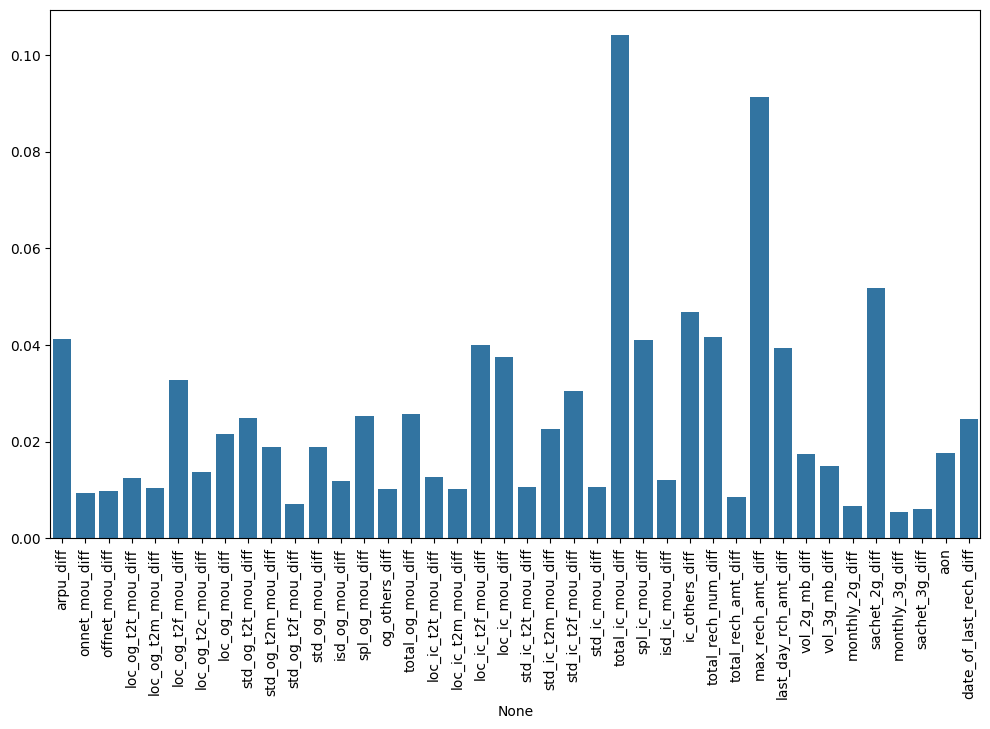

In [223]:
plt.figure(figsize=(12,7), dpi=100)
sns.barplot(x=xtrain.columns,y = model_6.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Using model_6 which has 2nd highest sensitivity we can find important features.
1. total_incomming_call_min_of_usage
2. maximum_reah_amnt

are theh 2 most important features among all.

## Business Interpretation

From the data we found that the users who churn are reducing their usage of the service every month, Where has the users who didn't churn are using the services consistently or they increasing their usage, So we did some feature engineering on our data, We found the difference between the 3 months values and made it as a single feature, So that the churn users will have hugh difference value and no churn user will have less difference value or negative value. Apart from this we found that the usage of roaming is very high for churn users when compared to no churn users, So we can speculate that some of the users are churning because there use to travel a lot and our service many not performes well in roaming or these users are relocated to different place and in that place our service may not performes well, To verify this we can chenk these customers locations and check for our networks performance in those locations and take necessary action accordingly.

## Business / Model Justification

- The main motive is to improve the performance of the model. As per the Business scenario, We have to predect the users who is going to churn, So that we can take some necessary steps to retain that user.

- As we discussed before in Telicom Industory getting a new customer is harder that retaing the old customer, we should predict the maximum number of churn customer, its ok even if we miss classified some of the not churn customers as churn (which mean we can compromise for the precision score). So we should look for the model which gives high recall score for class 1 (Sensitivity).

- So recall for the class 1 is the metric we should look for among all the models we built, and good precision is also important.

- From the above Model metrics table we can see that KNN model and XGBoost performed well according to our requirements, Where KNN model performes very well in Sensitivity (90%) but performes in precission (66%) is not good. The XGBoost model performes moderetly in Sensitivity (85%) but the precission in good (90%).

- So if the we decide to retaine the customers by giving some offers, selecting XGBoost model will help us to reduce the wastage of cost on non churn customers, or use KNN model accordingly.

## Predicting from the pickle file using validation data

In [226]:
import pickle 

In [607]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(model_7, f)

In [362]:
with open("best_model.pkl", "rb") as f:
    unpickled_best_model = pickle.load(f)

In [227]:
with open("best_model_xgb.pkl", "wb") as f:
    pickle.dump(model_6, f)